In [720]:
import numpy as np
import pandas as pd
import scipy
import seaborn as sns

import missingno as msno

# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
%matplotlib inline

import warnings

warnings.filterwarnings("ignore")

import sklearn.preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import precision_score, auc, roc_auc_score, roc_curve, precision_recall_curve

from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.linear_model import Ridge, Lasso
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import mean_squared_error

from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
# Training the model on the train data
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn import metrics



from scipy.stats.mstats import winsorize

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler 

from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE, RandomOverSampler as smot
# from imblearn.under_sampling import NearMiss, RandomUnderSampler
# from imblearn.combine import SMOTEENN, SMOTETomek

### Reading CSV files

In [721]:
df_2014 = pd.read_csv("2014_Financial_Data.csv")
df_2015 = pd.read_csv("2015_Financial_Data.csv")
df_2016 = pd.read_csv("2016_Financial_Data.csv")
df_2017 = pd.read_csv("2017_Financial_Data.csv")
df_2018 = pd.read_csv("2018_Financial_Data.csv")

In [722]:
nasdaq = pd.read_csv("nasdaq.csv")

In [723]:
nasdaq.shape

(7998, 3)

In [724]:
nasdaq.columns

Index(['Symbol', 'Name', 'Country'], dtype='object')

In [725]:
nasdaq.head()

,Symbol,Name,Country
0,A,Agilent Technologies Inc. Common Stock,United States
1,AA,Alcoa Corporation Common Stock,NaN
2,AAC,Ares Acquisition Corporation Class A Ordinary ...,NaN
3,AACG,ATA Creativity Global American Depositary Shares,China
4,AACIU,Armada Acquisition Corp. I Unit,United States


In [726]:
nasdaq.drop('Name', axis=1, inplace=True)

In [727]:
df_2014.shape

(3808, 225)

In [728]:
df_2015.shape

(4120, 225)

In [729]:
df_2016.shape

(4797, 225)

In [730]:
df_2017.shape

(4960, 225)

In [731]:
df_2018.shape

(4392, 225)

In [732]:
df_2014['Year'] = 2014
df_2015['Year'] = 2015
df_2016['Year'] = 2016
df_2017['Year'] = 2017
df_2018['Year'] = 2018

In [733]:
df_2014.columns

Index(['Unnamed: 0', 'Revenue', 'Revenue Growth', 'Cost of Revenue',
       'Gross Profit', 'R&D Expenses', 'SG&A Expense', 'Operating Expenses',
       'Operating Income', 'Interest Expense',
       ...
       'Inventory Growth', 'Asset Growth', 'Book Value per Share Growth',
       'Debt Growth', 'R&D Expense Growth', 'SG&A Expenses Growth', 'Sector',
       '2015 PRICE VAR [%]', 'Class', 'Year'],
      dtype='object', length=226)

In [734]:
df_2014.rename(columns={'2015 PRICE VAR [%]':'Next_Year_Price_Var[%]'}, inplace=True)
df_2015.rename(columns={'2016 PRICE VAR [%]':'Next_Year_Price_Var[%]'}, inplace=True)
df_2016.rename(columns={'2017 PRICE VAR [%]':'Next_Year_Price_Var[%]'}, inplace=True)
df_2017.rename(columns={'2018 PRICE VAR [%]':'Next_Year_Price_Var[%]'}, inplace=True)
df_2018.rename(columns={'2019 PRICE VAR [%]':'Next_Year_Price_Var[%]'}, inplace=True)

In [735]:
df = pd.concat([df_2014, df_2015, df_2016, df_2017, df_2018], axis = 0)

In [736]:
df.shape

(22077, 226)

In [737]:
df.columns

Index(['Unnamed: 0', 'Revenue', 'Revenue Growth', 'Cost of Revenue',
       'Gross Profit', 'R&D Expenses', 'SG&A Expense', 'Operating Expenses',
       'Operating Income', 'Interest Expense',
       ...
       'Inventory Growth', 'Asset Growth', 'Book Value per Share Growth',
       'Debt Growth', 'R&D Expense Growth', 'SG&A Expenses Growth', 'Sector',
       'Next_Year_Price_Var[%]', 'Class', 'Year'],
      dtype='object', length=226)

In [738]:
df.head()

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,Next_Year_Price_Var[%],Class,Year
0,PG,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.000000e+00,2.146100e+10,2.146100e+10,1.391000e+10,7.090000e+08,...,-0.0217,0.0359,0.0316,0.1228,0.0000,-0.1746,Consumer Defensive,-9.323276,0,2014
1,VIPS,3.734148e+09,1.1737,2.805625e+09,9.285226e+08,1.083303e+08,3.441414e+08,7.939267e+08,1.345959e+08,1.214869e+07,...,NaN,NaN,NaN,NaN,1.6484,1.7313,Consumer Defensive,-25.512193,0,2014
2,KR,9.837500e+10,0.0182,7.813800e+10,2.023700e+10,0.000000e+00,1.519600e+10,1.751200e+10,2.725000e+09,4.430000e+08,...,0.0981,0.1886,0.3268,0.2738,0.0000,0.0234,Consumer Defensive,33.118297,1,2014
3,RAD,2.552641e+10,0.0053,1.820268e+10,7.323734e+09,0.000000e+00,6.561162e+09,6.586482e+09,7.372520e+08,4.245910e+08,...,-0.0510,-0.0189,0.1963,-0.0458,0.0000,-0.0060,Consumer Defensive,2.752291,1,2014
4,GIS,1.790960e+10,0.0076,1.153980e+10,6.369800e+09,0.000000e+00,3.474300e+09,3.412400e+09,2.957400e+09,3.024000e+08,...,0.0090,0.0215,0.0274,0.1025,0.0000,-0.0220,Consumer Defensive,12.897715,1,2014


In [739]:
df.rename(columns={"Unnamed: 0": "Symbol"}, inplace=True)
# df_2014.rename(columns={'2015 PRICE VAR [%]':'Next_Year_Price_Var[%]'}, inplace=True)

In [740]:
df = pd.merge(df, nasdaq, how="inner", on="Symbol")

In [741]:
df.shape

(18703, 227)

In [742]:
df.head()

,Symbol,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,Next_Year_Price_Var[%],Class,Year,Country
0,PG,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.0,2.146100e+10,2.146100e+10,1.391000e+10,709000000.0,...,0.0359,0.0316,0.1228,0.0,-0.1746,Consumer Defensive,-9.323276,0,2014,United States
1,PG,7.074900e+10,-0.0491,3.705600e+10,3.369300e+10,0.0,2.061600e+10,2.264400e+10,1.104900e+10,626000000.0,...,-0.1024,-0.1013,-0.1432,0.0,-0.0394,Consumer Defensive,10.809451,1,2015,United States
2,PG,6.529900e+10,-0.0770,3.290900e+10,3.239000e+10,0.0,1.894900e+10,1.894900e+10,1.344100e+10,579000000.0,...,-0.0182,-0.0627,0.0083,0.0,-0.0809,Consumer Defensive,12.532463,1,2016,United States
3,PG,6.505800e+10,-0.0037,3.263800e+10,3.242000e+10,0.0,1.865400e+10,1.865400e+10,1.376600e+10,465000000.0,...,-0.0529,0.0012,0.0325,0.0,-0.0156,Consumer Defensive,4.975151,1,2017,United States
4,PG,6.683200e+10,0.0273,3.443200e+10,3.240000e+10,0.0,1.903700e+10,1.903700e+10,1.336300e+10,506000000.0,...,-0.0174,-0.0357,-0.0097,0.0,0.0205,Consumer Defensive,40.680273,1,2018,United States


In [743]:
df.Country.value_counts()

United States     14964
Canada              607
China               389
Israel              304
United Kingdom      190
Bermuda             156
Netherlands         102
Brazil               93
Ireland              80
Switzerland          76
Greece               75
Argentina            63
Mexico               60
India                53
France               49
Australia            46
South Korea          45
Cayman Islands       45
Taiwan               45
Germany              39
Hong Kong            37
South Africa         35
Japan                35
Luxembourg           35
Chile                30
Singapore            30
Denmark              23
Spain                20
Belgium              20
Sweden               15
Peru                 15
Puerto Rico          15
Monaco               15
Colombia             15
Curacao              10
Jersey               10
Russia               10
Panama               10
Italy                10
Isle of Man           5
Guernsey              5
Philippines     

In [744]:
df.Country.isnull().sum()

787

In [745]:
#Next_Year_Price_Var[%] +ve ---> class = 1, if -ve -----> class = 0
df.drop('Next_Year_Price_Var[%]', axis=1, inplace=True)

In [746]:
df.rename(columns={"Symbol":"Name"}, inplace=True)

In [747]:
df.Name.nunique()

4116

In [748]:
df.shape

(18703, 226)

In [749]:
df.info

<bound method DataFrame.info of         Name       Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
0         PG  7.440100e+10         -0.0713     3.903000e+10  3.537100e+10   
1         PG  7.074900e+10         -0.0491     3.705600e+10  3.369300e+10   
2         PG  6.529900e+10         -0.0770     3.290900e+10  3.239000e+10   
3         PG  6.505800e+10         -0.0037     3.263800e+10  3.242000e+10   
4         PG  6.683200e+10          0.0273     3.443200e+10  3.240000e+10   
...      ...           ...             ...              ...           ...   
18698    BAK  1.494842e+10          0.0047     1.196681e+10  2.981610e+09   
18699    DNB  3.011000e+09             NaN     2.325000e+09  6.860000e+08   
18700   HYAC           NaN             NaN              NaN           NaN   
18701  HYACU           NaN             NaN              NaN           NaN   
18702    LCA  0.000000e+00          0.0000     0.000000e+00  0.000000e+00   

       R&D Expenses  SG&A Expense  Operatin

In [750]:
df.describe()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Class,Year
count,1.786500e+04,17335.000000,1.739000e+04,1.784100e+04,1.719400e+04,1.746200e+04,1.740500e+04,1.792300e+04,1.738800e+04,1.778000e+04,...,15909.000000,17283.000000,17015.000000,17053.000000,16664.000000,16865.000000,16999.000000,17053.000000,18703.000000,18703.000000
mean,5.131141e+09,4.044478,3.194422e+09,2.017499e+09,1.099452e+08,9.257510e+08,1.427406e+09,6.293855e+08,9.737632e+07,5.375073e+08,...,0.018180,12.531312,0.153511,0.829158,0.871056,3.682542,0.296431,0.257921,0.563706,2016.085548
std,2.094265e+10,335.687819,1.515262e+10,8.058267e+09,8.007416e+08,3.954889e+09,5.768307e+09,2.986434e+09,4.666766e+08,2.587647e+09,...,0.262661,1183.058348,3.057425,43.258736,57.650800,184.199300,13.801622,3.901991,0.495938,1.378392
min,-6.276160e+08,-12.769300,-2.986888e+09,-1.280800e+10,-1.098000e+08,-1.401594e+08,-5.495512e+09,-1.933900e+10,-1.710954e+09,-2.177200e+10,...,-1.000000,-1.000000,-1.000000,-1.000000,-379.478300,-1.051000,-2.662200,-2.369900,0.000000,2014.000000
25%,6.571986e+07,-0.011300,3.883750e+06,3.512800e+07,0.000000e+00,1.887951e+07,3.835900e+07,-2.692896e+06,0.000000e+00,-6.229009e+06,...,0.000000,-0.047100,0.000000,-0.025900,-0.093025,-0.064400,0.000000,-0.010900,0.000000,2015.000000
50%,4.771070e+08,0.058600,1.717705e+08,2.137290e+08,0.000000e+00,8.901150e+07,1.664520e+08,4.391900e+07,3.823064e+06,3.094914e+07,...,0.000000,0.010900,0.000000,0.049500,0.035300,0.000000,0.000000,0.060500,1.000000,2016.000000
75%,2.565486e+09,0.178700,1.333174e+09,9.678560e+08,1.265675e+07,4.091312e+08,6.747880e+08,2.880000e+08,5.092050e+07,2.287124e+08,...,0.049800,0.195450,0.064200,0.173500,0.141525,0.150300,0.000000,0.179300,1.000000,2017.000000
max,8.482620e+11,42138.663900,3.861020e+11,4.621600e+11,2.883700e+10,1.856830e+11,3.056050e+11,1.565540e+11,3.152300e+10,8.720500e+10,...,5.400500,153332.333300,293.473000,5468.426400,7039.325900,17646.823500,1542.611000,324.926800,1.000000,2018.000000


In [751]:
## Removing "Year" because our future companies will have different years and it should not affect our final call
df.drop("Year", axis=1, inplace=True)

In [752]:
## Removing "Name" because our future companies will have different Name and it should not affect our final call
df.drop("Name", axis=1, inplace=True)

In [753]:
df.head(2)

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,Class,Country
0,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.0,2.146100e+10,2.146100e+10,1.391000e+10,709000000.0,1.449400e+10,...,-0.0187,-0.0217,0.0359,0.0316,0.1228,0.0,-0.1746,Consumer Defensive,0,United States
1,7.074900e+10,-0.0491,3.705600e+10,3.369300e+10,0.0,2.061600e+10,2.264400e+10,1.104900e+10,626000000.0,9.761000e+09,...,-0.2847,-0.2634,-0.1024,-0.1013,-0.1432,0.0,-0.0394,Consumer Defensive,1,United States


In [754]:
df.loc[(df.Country=="United States")].shape

(14964, 224)

In [755]:
df.loc[(df.Country=="United States")]

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,Class,Country
0,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.0,2.146100e+10,2.146100e+10,1.391000e+10,709000000.0,1.449400e+10,...,-0.0187,-0.0217,0.0359,0.0316,0.1228,0.0,-0.1746,Consumer Defensive,0,United States
1,7.074900e+10,-0.0491,3.705600e+10,3.369300e+10,0.0,2.061600e+10,2.264400e+10,1.104900e+10,626000000.0,9.761000e+09,...,-0.2847,-0.2634,-0.1024,-0.1013,-0.1432,0.0,-0.0394,Consumer Defensive,1,United States
2,6.529900e+10,-0.0770,3.290900e+10,3.239000e+10,0.0,1.894900e+10,1.894900e+10,1.344100e+10,579000000.0,1.385000e+10,...,-0.0427,-0.0528,-0.0182,-0.0627,0.0083,0.0,-0.0809,Consumer Defensive,1,United States
3,6.505800e+10,-0.0037,3.263800e+10,3.242000e+10,0.0,1.865400e+10,1.865400e+10,1.376600e+10,465000000.0,1.838900e+10,...,0.0505,-0.0195,-0.0529,0.0012,0.0325,0.0,-0.0156,Consumer Defensive,1,United States
4,6.683200e+10,0.0273,3.443200e+10,3.240000e+10,0.0,1.903700e+10,1.903700e+10,1.336300e+10,506000000.0,1.321500e+10,...,0.0200,0.0247,-0.0174,-0.0357,-0.0097,0.0,0.0205,Consumer Defensive,1,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18697,NaN,NaN,NaN,3.648000e+09,NaN,NaN,7.947000e+09,2.206000e+09,-43000000.0,NaN,...,0.0827,0.0000,0.2680,0.2433,-0.0196,NaN,NaN,Consumer Cyclical,0,United States
18699,3.011000e+09,NaN,2.325000e+09,6.860000e+08,NaN,6.230000e+08,6.100000e+08,7.600000e+07,94000000.0,1.600000e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Industrials,1,United States
18700,NaN,NaN,NaN,NaN,NaN,NaN,5.000000e+06,-5.000000e+06,NaN,1.000000e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Industrials,1,United States
18701,NaN,NaN,NaN,NaN,NaN,NaN,5.000000e+06,-5.000000e+06,NaN,1.000000e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Industrials,1,United States


In [756]:
# Selecting only United States

In [757]:
# df = df.loc[(df.Country=="United States")]

In [758]:
df.drop('Country', axis=1, inplace=True)

### Understanding Null Value Distribution

In [759]:
df.isnull().sum().sort_values(ascending=False)

operatingCycle                                18692
cashConversionCycle                           18692
shortTermCoverageRatios                        8886
10Y Shareholders Equity Growth (per Share)     7657
10Y Net Income Growth (per Share)              7527
                                              ...  
Net cash flow / Change in cash                  782
Operating Income                                780
Financing Cash Flow                             755
Sector                                            0
Class                                             0
Length: 223, dtype: int64

In [760]:
(df.isnull().sum() * 100 / len(df)).sort_values(ascending=False)

operatingCycle                                99.941186
cashConversionCycle                           99.941186
shortTermCoverageRatios                       47.511094
10Y Shareholders Equity Growth (per Share)    40.939956
10Y Net Income Growth (per Share)             40.244881
                                                ...    
Net cash flow / Change in cash                 4.181147
Operating Income                               4.170454
Financing Cash Flow                            4.036786
Sector                                         0.000000
Class                                          0.000000
Length: 223, dtype: float64

In [761]:
(df.isnull().sum() * 100 / len(df)).sort_values(ascending=True).head(15)

Class                             0.000000
Sector                            0.000000
Financing Cash Flow               4.036786
Operating Income                  4.170454
Net cash flow / Change in cash    4.181147
Receivables                       4.352243
Revenue                           4.480565
Earnings Before Tax Margin        4.534032
Gross Margin                      4.555419
Gross Profit                      4.608886
Operating Cash Flow               4.614233
Retained earnings (deficit)       4.817409
EPS Diluted                       4.854836
Cash and cash equivalents         4.892263
EPS                               4.918997
dtype: float64

In [762]:
# all cols have some null values
len(df.isnull().any())

223

In [763]:
# No columns with all null values
df.columns[df.isnull().all()]

Index([], dtype='object')

In [764]:
# Defining a funtion to add the count/frequency values as annotation to histogram.
def annotate_graph(ax):
    for bar in ax.patches:         
        ax.annotate(format((bar.get_height()), '.0f'),                    
                    (bar.get_x() + bar.get_width() / 2,  bar.get_height()),                    
                    ha='center', va='center',                    
                    size=10, xytext=(0, 8),                    
                    textcoords='offset points')
    return ax

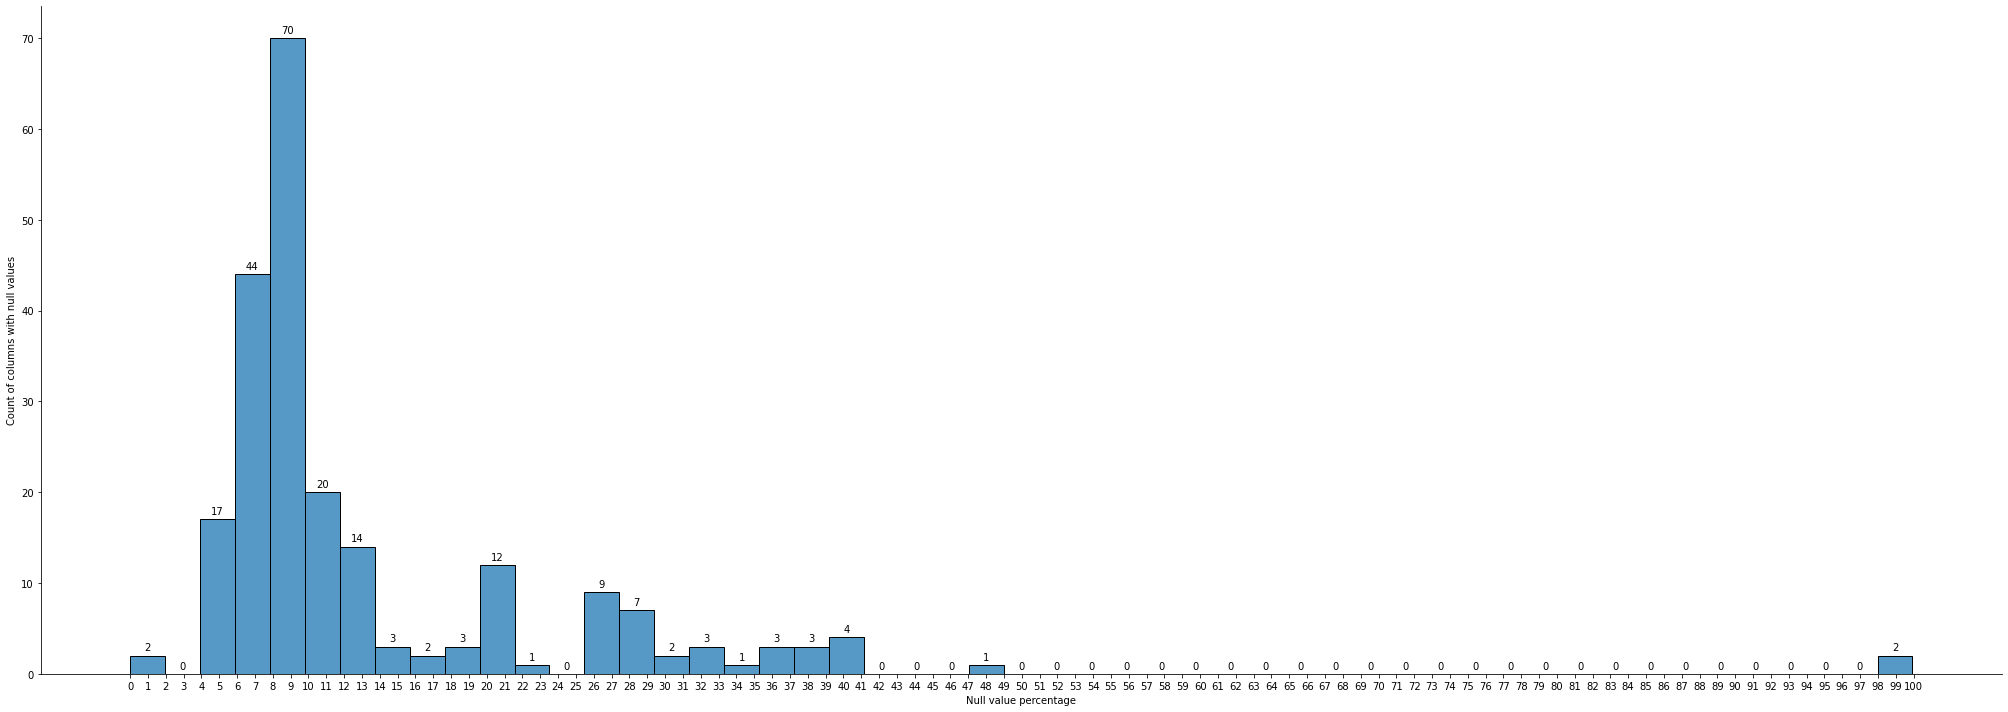

In [765]:
# Plotting histogram for the dataframe and columns having null values.
plt.figure(figsize=(28,10))

ax = sns.histplot(round((df.isnull().sum()/len(df.index) * 100).sort_values(ascending=False), 2))
ax = annotate_graph(ax)

ax.set(xticks=np.arange(0,101))
ax.set(xlabel='Null value percentage', ylabel='Count of columns with null values')
sns.despine()
plt.tight_layout()

<AxesSubplot:>

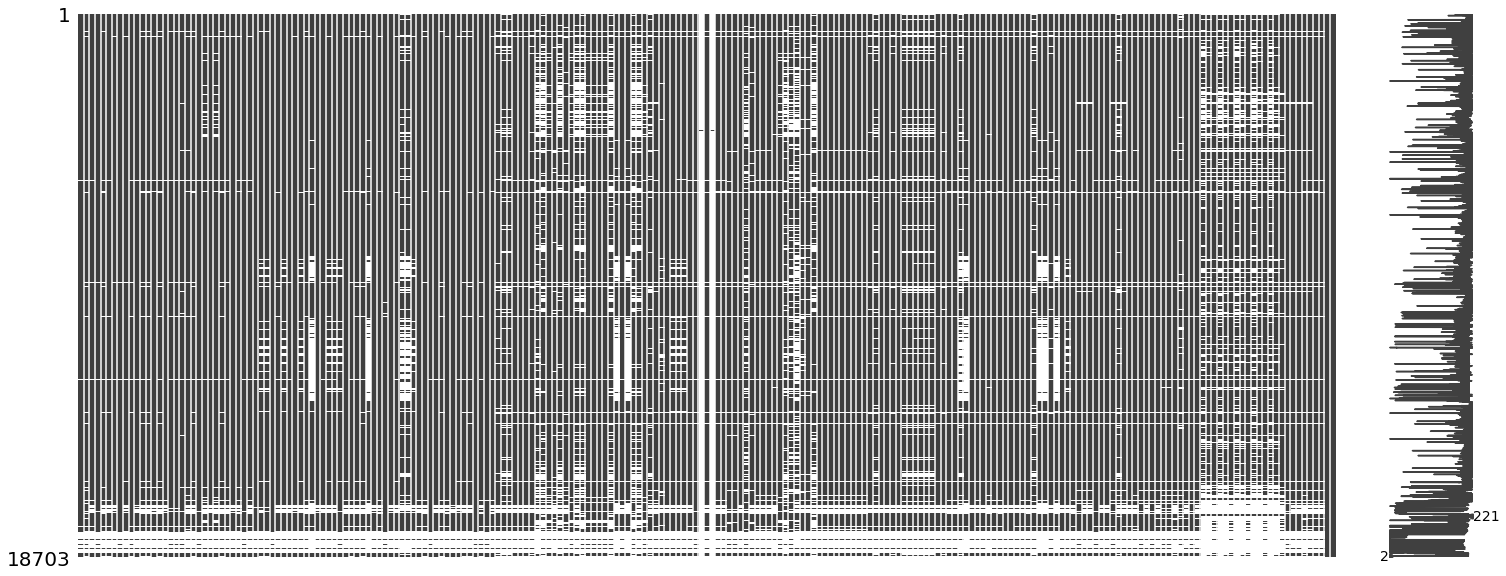

In [766]:
msno.matrix(df)

In [767]:
# defining a function to get more than cutoff percent missing value

def get_missing_value_percentage(cutoff):
    y = pd.DataFrame( round((df.isnull().sum()/len(df.index) * 100).sort_values(ascending=False), 2))
    y.rename(columns={0:"Percentage"}, inplace=True)
    y2 = y[y.Percentage>cutoff]
    return y2

In [768]:
# get columns with more than 70% missing values
greater_than_70 = get_missing_value_percentage(70)

In [769]:
len(greater_than_70)

2

In [770]:
greater_than_70

,Percentage
operatingCycle,99.94
cashConversionCycle,99.94


In [771]:
# get columns with more than 50% missing values
greater_than_50 = get_missing_value_percentage(50)

In [772]:
len(greater_than_50)

2

In [773]:
greater_than_50

,Percentage
operatingCycle,99.94
cashConversionCycle,99.94


In [774]:
# get columns with more than 20% missing values
greater_than_20 = get_missing_value_percentage(20)
greater_than_20

,Percentage
operatingCycle,99.94
cashConversionCycle,99.94
shortTermCoverageRatios,47.51
10Y Shareholders Equity Growth (per Share),40.94
10Y Net Income Growth (per Share),40.24
10Y Revenue Growth (per Share),40.24
10Y Operating CF Growth (per Share),40.01
10Y Dividend per Share Growth (per Share),38.58
dividendPayoutRatio,37.81
priceEarningsToGrowthRatio,37.81


### Removing Null Values

In [775]:
# function to drop cols which have more than 20% null values

def remove_cols_with_nulls (df, threshold):
    myCol = list(df.columns)
    for col in myCol: 
        percentage = (df[col].isnull().sum()/len(df[col]))*100
        if percentage>threshold:
            df.drop(col, axis=1, inplace=True)

In [776]:
df.shape

(18703, 223)

In [777]:
remove_cols_with_nulls(df, 20)

In [778]:
df.shape

(18703, 175)

In [779]:
len(df.columns[(df.isnull().any())])

173

In [780]:
# Deleting rows with any null value
df.dropna(how='all',axis=0, inplace=True) 

In [781]:
# Therefore, there is no row will all NULL values
df.shape

(18703, 175)

In [782]:
# Deleting rows with any null value
df.dropna(how='any',axis=0, inplace=True) 

In [783]:
df.shape

(10900, 175)

<AxesSubplot:>

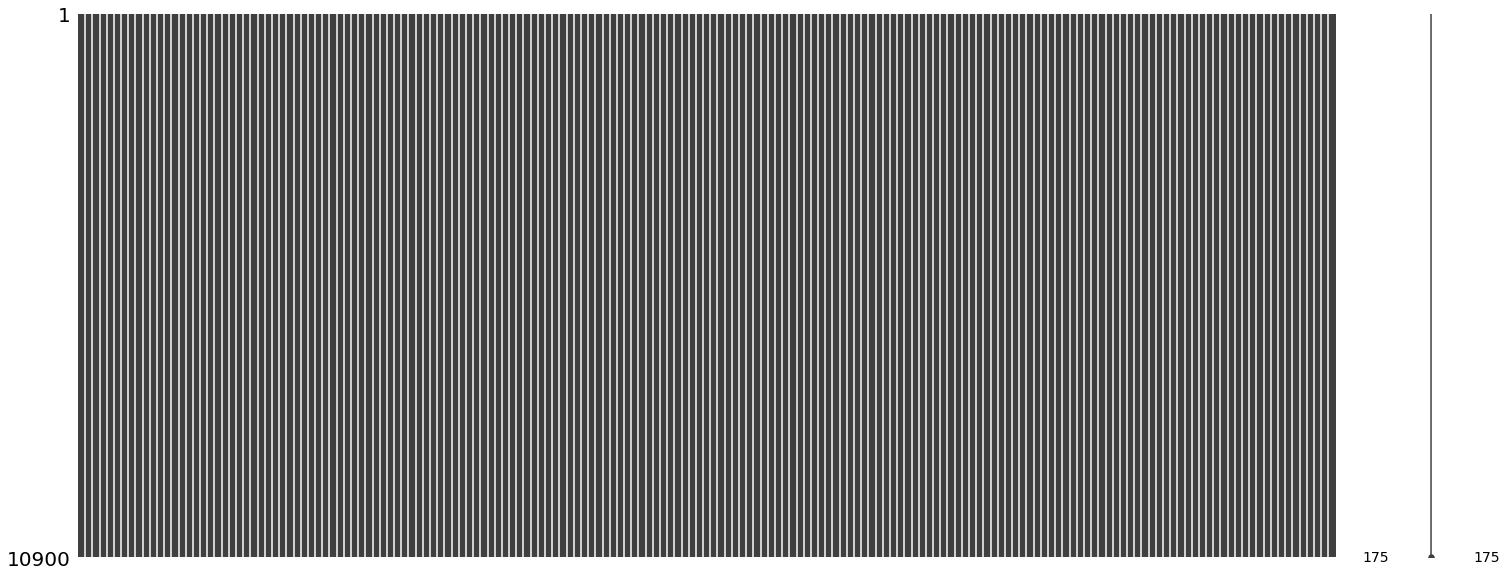

In [784]:
msno.matrix(df)

In [785]:
df.isnull().any().sum()

0

In [786]:
df.columns

Index(['Revenue', 'Revenue Growth', 'Cost of Revenue', 'Gross Profit',
       'R&D Expenses', 'SG&A Expense', 'Operating Expenses',
       'Operating Income', 'Interest Expense', 'Earnings before Tax',
       ...
       '3Y Dividend per Share Growth (per Share)', 'Receivables growth',
       'Inventory Growth', 'Asset Growth', 'Book Value per Share Growth',
       'Debt Growth', 'R&D Expense Growth', 'SG&A Expenses Growth', 'Sector',
       'Class'],
      dtype='object', length=175)

In [787]:
df.select_dtypes('number')

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,3Y Shareholders Equity Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Class
3,6.505800e+10,-0.0037,3.263800e+10,3.242000e+10,0.000000e+00,1.865400e+10,1.865400e+10,1.376600e+10,4.650000e+08,1.838900e+10,...,-0.0552,0.0329,0.0505,-0.0195,-0.0529,0.0012,0.0325,0.0000,-0.0156,1
4,6.683200e+10,0.0273,3.443200e+10,3.240000e+10,0.000000e+00,1.903700e+10,1.903700e+10,1.336300e+10,5.060000e+08,1.321500e+10,...,-0.0328,0.0241,0.0200,0.0247,-0.0174,-0.0357,-0.0097,0.0000,0.0205,1
11,1.084650e+11,0.1026,8.551200e+10,2.295300e+10,0.000000e+00,1.716100e+10,1.981600e+10,3.137000e+09,4.880000e+08,2.630000e+09,...,0.1781,0.1651,0.1344,0.0065,0.0415,0.0535,0.0254,0.0000,0.1293,0
12,1.098300e+11,0.0126,8.549600e+10,2.433400e+10,0.000000e+00,1.794600e+10,2.075800e+10,3.576000e+09,4.820000e+08,3.084000e+09,...,0.2139,0.2650,0.3697,0.0844,0.1115,0.2797,0.0416,0.0000,0.0457,0
13,1.153370e+11,0.0501,8.950200e+10,2.583500e+10,0.000000e+00,1.916200e+10,2.238300e+10,3.452000e+09,5.220000e+08,2.932000e+09,...,0.1073,0.1359,-0.0490,0.0637,0.0769,0.0071,0.1654,0.0000,0.0678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18682,4.134120e+08,0.0092,2.405600e+08,1.728520e+08,0.000000e+00,3.000500e+07,5.833300e+07,1.145190e+08,2.069400e+07,8.491100e+07,...,0.0853,0.0000,-0.2110,0.0000,0.0112,0.6327,-0.4436,0.0000,-0.1174,1
18691,1.901740e+08,0.5127,3.787500e+07,1.522990e+08,3.937900e+07,1.475440e+08,1.869230e+08,-3.462400e+07,0.000000e+00,-3.230900e+07,...,0.0000,0.0000,0.5777,0.0000,1.4482,1.7272,0.0000,0.1734,0.4790,1
18693,3.702738e+07,0.3446,2.569266e+07,1.133472e+07,4.001757e+06,1.050856e+07,1.451031e+07,-3.175589e+06,6.569300e+04,-2.533062e+06,...,0.2799,0.0000,1.0298,0.8461,1.1314,0.8599,-0.5862,0.4892,0.6349,0
18695,1.506840e+08,0.1559,9.600300e+07,5.468100e+07,1.621000e+07,7.610600e+07,9.559800e+07,-4.091700e+07,3.264000e+06,-5.304200e+07,...,0.0000,0.0000,0.1814,0.0000,0.5261,1.0422,-0.1806,0.3342,0.4628,1


In [788]:
df['R&D Expenses'].value_counts()

0.000000e+00    6811
7.310000e+07       3
1.060000e+08       3
1.050000e+08       3
8.200000e+07       3
                ... 
1.615691e+06       1
2.821070e+08       1
1.623000e+07       1
2.433500e+07       1
5.570029e+06       1
Name: R&D Expenses, Length: 3985, dtype: int64

In [789]:
df.shape[0]

10900

In [790]:
df['R&D Expenses'].value_counts(normalize=True).sort_values(ascending=False)[0]

0.6248623853211009

In [791]:
# more than 50% value of R&D expense is 0. Remove numeric cols with dominant values

In [792]:
df.operatingProfitMargin.value_counts().sort_values(ascending=False).iloc[0]

10900

In [793]:
#Code goes to except block when single value is met ---> which is SERIES and you cannot do simple indexing in SERIES

In [794]:
counter = 0
for col in list(df.select_dtypes('number').columns):
    try:  
        val = df[col].value_counts(normalize=True).sort_values(ascending=False)[0]
        if(val>0.5):
            df.drop(col, axis=1, inplace=True)
            counter = counter+1
    except:
        val = df[col].value_counts(normalize=True).sort_values(ascending=False).iloc[0]
        if(val>0.5):
            df.drop(col, axis=1, inplace=True)
            counter = counter+1
        
    
print("Total Columns Deleted = ",counter)

Total Columns Deleted =  13


In [795]:
df.shape

(10900, 162)

In [796]:
df.columns

Index(['Revenue', 'Revenue Growth', 'Cost of Revenue', 'Gross Profit',
       'SG&A Expense', 'Operating Expenses', 'Operating Income',
       'Interest Expense', 'Earnings before Tax', 'Income Tax Expense',
       ...
       '3Y Net Income Growth (per Share)',
       '3Y Shareholders Equity Growth (per Share)', 'Receivables growth',
       'Inventory Growth', 'Asset Growth', 'Book Value per Share Growth',
       'Debt Growth', 'SG&A Expenses Growth', 'Sector', 'Class'],
      dtype='object', length=162)

In [797]:
df.select_dtypes(include='number')

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,...,3Y Operating CF Growth (per Share),3Y Net Income Growth (per Share),3Y Shareholders Equity Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,SG&A Expenses Growth,Class
3,6.505800e+10,-0.0037,3.263800e+10,3.242000e+10,1.865400e+10,1.865400e+10,1.376600e+10,4.650000e+08,1.838900e+10,3.063000e+09,...,-0.0112,0.1167,-0.0552,0.0505,-0.0195,-0.0529,0.0012,0.0325,-0.0156,1
4,6.683200e+10,0.0273,3.443200e+10,3.240000e+10,1.903700e+10,1.903700e+10,1.336300e+10,5.060000e+08,1.321500e+10,3.465000e+09,...,0.0317,0.1435,-0.0328,0.0200,0.0247,-0.0174,-0.0357,-0.0097,0.0205,1
11,1.084650e+11,0.1026,8.551200e+10,2.295300e+10,1.716100e+10,1.981600e+10,3.137000e+09,4.880000e+08,2.630000e+09,9.020000e+08,...,0.2402,0.5114,0.1781,0.1344,0.0065,0.0415,0.0535,0.0254,0.1293,0
12,1.098300e+11,0.0126,8.549600e+10,2.433400e+10,1.794600e+10,2.075800e+10,3.576000e+09,4.820000e+08,3.084000e+09,1.045000e+09,...,0.2247,0.1455,0.2139,0.3697,0.0844,0.1115,0.2797,0.0416,0.0457,0
13,1.153370e+11,0.0501,8.950200e+10,2.583500e+10,1.916200e+10,2.238300e+10,3.452000e+09,5.220000e+08,2.932000e+09,9.570000e+08,...,0.0927,0.1237,0.1073,-0.0490,0.0637,0.0769,0.0071,0.1654,0.0678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18682,4.134120e+08,0.0092,2.405600e+08,1.728520e+08,3.000500e+07,5.833300e+07,1.145190e+08,2.069400e+07,8.491100e+07,2.120700e+07,...,0.3226,1.2723,0.0853,-0.2110,0.0000,0.0112,0.6327,-0.4436,-0.1174,1
18691,1.901740e+08,0.5127,3.787500e+07,1.522990e+08,1.475440e+08,1.869230e+08,-3.462400e+07,0.000000e+00,-3.230900e+07,1.337000e+06,...,0.0000,0.0000,0.0000,0.5777,0.0000,1.4482,1.7272,0.0000,0.4790,1
18693,3.702738e+07,0.3446,2.569266e+07,1.133472e+07,1.050856e+07,1.451031e+07,-3.175589e+06,6.569300e+04,-2.533062e+06,-1.396784e+06,...,0.0000,0.0000,0.2799,1.0298,0.8461,1.1314,0.8599,-0.5862,0.6349,0
18695,1.506840e+08,0.1559,9.600300e+07,5.468100e+07,7.610600e+07,9.559800e+07,-4.091700e+07,3.264000e+06,-5.304200e+07,0.000000e+00,...,0.0000,0.0000,0.0000,0.1814,0.0000,0.5261,1.0422,-0.1806,0.4628,1


In [798]:
df.select_dtypes(include='object')

,Sector
3,Consumer Defensive
4,Consumer Defensive
11,Consumer Defensive
12,Consumer Defensive
13,Consumer Defensive
...,...
18682,Financial Services
18691,Technology
18693,Technology
18695,Technology


In [799]:
df.select_dtypes(include='number').shape

(10900, 161)

In [800]:
df.select_dtypes(include='object').shape

(10900, 1)

In [801]:
df.select_dtypes(include='category').shape

(10900, 0)

In [802]:
df.shape

(10900, 162)

In [803]:
# 155 cols ----> 154 number, 1 Object

In [804]:
df.Sector.value_counts()

Technology                2030
Industrials               1769
Healthcare                1549
Financial Services        1400
Consumer Cyclical         1376
Basic Materials            638
Energy                     567
Consumer Defensive         547
Real Estate                531
Utilities                  330
Communication Services     163
Name: Sector, dtype: int64

In [805]:
sector_list = list(df.Sector.unique())

In [806]:
sector_list

['Consumer Defensive',
 'Basic Materials',
 'Healthcare',
 'Consumer Cyclical',
 'Industrials',
 'Real Estate',
 'Communication Services',
 'Energy',
 'Financial Services',
 'Utilities',
 'Technology']

In [807]:
pd.get_dummies(df.Sector, drop_first=True)

,Communication Services,Consumer Cyclical,Consumer Defensive,Energy,Financial Services,Healthcare,Industrials,Real Estate,Technology,Utilities
3,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0
11,0,0,1,0,0,0,0,0,0,0
12,0,0,1,0,0,0,0,0,0,0
13,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
18682,0,0,0,0,1,0,0,0,0,0
18691,0,0,0,0,0,0,0,0,1,0
18693,0,0,0,0,0,0,0,0,1,0
18695,0,0,0,0,0,0,0,0,1,0


In [808]:
Sector_status = pd.get_dummies(df.Sector, drop_first=True)

#Adding the result to the original housing dataframe

df = pd.concat([df, Sector_status], axis=1)


In [809]:
# Droppig Sector Column as we are done with 
df.drop("Sector", axis=1, inplace=True)

In [810]:
df.shape

(10900, 171)

In [811]:
df.Energy.value_counts()

0    10333
1      567
Name: Energy, dtype: int64

In [812]:
# Sector Column will be dropped after Exploratory Data Analysis

In [813]:
df.head()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,...,Communication Services,Consumer Cyclical,Consumer Defensive,Energy,Financial Services,Healthcare,Industrials,Real Estate,Technology,Utilities
3,6.505800e+10,-0.0037,3.263800e+10,3.242000e+10,1.865400e+10,1.865400e+10,1.376600e+10,465000000.0,1.838900e+10,3.063000e+09,...,0,0,1,0,0,0,0,0,0,0
4,6.683200e+10,0.0273,3.443200e+10,3.240000e+10,1.903700e+10,1.903700e+10,1.336300e+10,506000000.0,1.321500e+10,3.465000e+09,...,0,0,1,0,0,0,0,0,0,0
11,1.084650e+11,0.1026,8.551200e+10,2.295300e+10,1.716100e+10,1.981600e+10,3.137000e+09,488000000.0,2.630000e+09,9.020000e+08,...,0,0,1,0,0,0,0,0,0,0
12,1.098300e+11,0.0126,8.549600e+10,2.433400e+10,1.794600e+10,2.075800e+10,3.576000e+09,482000000.0,3.084000e+09,1.045000e+09,...,0,0,1,0,0,0,0,0,0,0
13,1.153370e+11,0.0501,8.950200e+10,2.583500e+10,1.916200e+10,2.238300e+10,3.452000e+09,522000000.0,2.932000e+09,9.570000e+08,...,0,0,1,0,0,0,0,0,0,0


# Removing columns with single value

In [814]:
def removeSingleValue (col):
    length = len(df[col].value_counts())
    if (length<2):
        print(col)
        df.drop(col, axis=1, inplace=True)

In [815]:
for col in df.columns:
    removeSingleValue(col)

In [816]:
num_col = list(df.dtypes[df.dtypes !='object'].index)

In [817]:
len(num_col)

171

In [818]:
df.shape

(10900, 171)

### Duplicate Row Checker

In [819]:
df.duplicated().sum()

0

In [820]:
# Moving "Class" Column to end
df['Result'] = df.Class
df.drop("Class", axis=1, inplace=True)
df = df.rename(columns={"Result":"Class"})

In [821]:
df.head()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,...,Consumer Cyclical,Consumer Defensive,Energy,Financial Services,Healthcare,Industrials,Real Estate,Technology,Utilities,Class
3,6.505800e+10,-0.0037,3.263800e+10,3.242000e+10,1.865400e+10,1.865400e+10,1.376600e+10,465000000.0,1.838900e+10,3.063000e+09,...,0,1,0,0,0,0,0,0,0,1
4,6.683200e+10,0.0273,3.443200e+10,3.240000e+10,1.903700e+10,1.903700e+10,1.336300e+10,506000000.0,1.321500e+10,3.465000e+09,...,0,1,0,0,0,0,0,0,0,1
11,1.084650e+11,0.1026,8.551200e+10,2.295300e+10,1.716100e+10,1.981600e+10,3.137000e+09,488000000.0,2.630000e+09,9.020000e+08,...,0,1,0,0,0,0,0,0,0,0
12,1.098300e+11,0.0126,8.549600e+10,2.433400e+10,1.794600e+10,2.075800e+10,3.576000e+09,482000000.0,3.084000e+09,1.045000e+09,...,0,1,0,0,0,0,0,0,0,0
13,1.153370e+11,0.0501,8.950200e+10,2.583500e+10,1.916200e+10,2.238300e+10,3.452000e+09,522000000.0,2.932000e+09,9.570000e+08,...,0,1,0,0,0,0,0,0,0,0


# Exploratory Data Analysis

In [822]:
# Get number of positve and negative examples
pos = df[df["Class"] == 1].shape[0]
neg = df[df["Class"] == 0].shape[0]

print("Profitable Companies = ",pos)
print("Lossy Companies = ",neg)

Profitable Companies =  6276
Lossy Companies =  4624


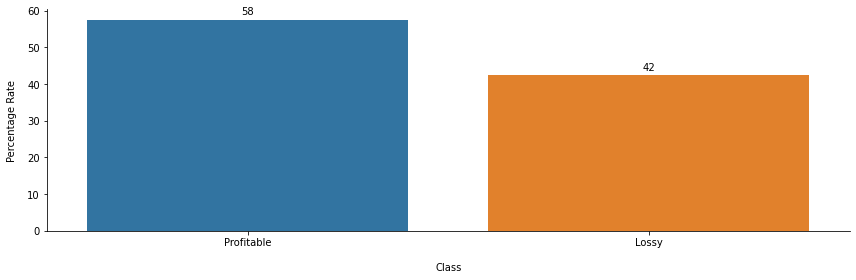

In [823]:
# Plotting the profitable vs non-profitable customers.
plt.figure(figsize = (12, 4))

length = len(df)
ax = sns.barplot(x = ['Profitable','Lossy'], y = [pos/length * 100,neg/length * 100])
plt.xlabel("Class", labelpad = 15)
plt.ylabel('Percentage Rate', labelpad = 10)

# Call Custom Function
annotate_graph(ax)


sns.despine()
plt.tight_layout()
plt.show()

In [824]:
# Therefore, the output class is balanced

In [825]:
corr_df = pd.DataFrame(df.corr()['Class'].sort_values(ascending = False))

In [826]:
positive_corr = corr_df.loc[(corr_df.Class>0) & (corr_df.Class<1)]

In [827]:
negative_corr = corr_df.loc[corr_df.Class<0]

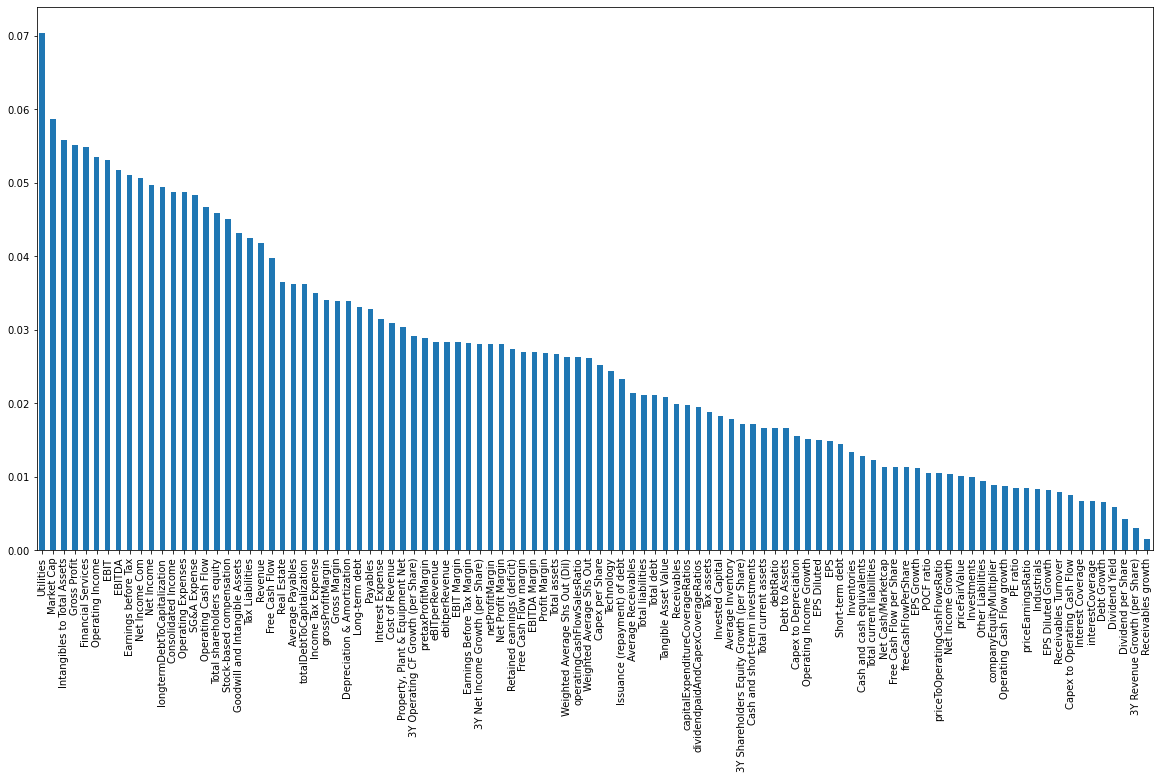

In [828]:
# Creating bar chart for showing co-relation of all variables with Class.
plt.figure(figsize=(20,10))
positive_corr.Class.plot(kind = 'bar')
plt.show()

In [829]:
positive_corr=positive_corr.reset_index()

In [830]:
positive_corr

,index,Class
0,Utilities,0.070412
1,Market Cap,0.058688
2,Intangibles to Total Assets,0.055822
3,Gross Profit,0.055168
4,Financial Services,0.054876
...,...,...
97,Debt Growth,0.006539
98,Dividend Yield,0.005911
99,Dividend per Share,0.004309
100,3Y Revenue Growth (per Share),0.003036


In [831]:
positive_corr = positive_corr.rename(columns={"index":"col_name"})

In [832]:
positive_corr

,col_name,Class
0,Utilities,0.070412
1,Market Cap,0.058688
2,Intangibles to Total Assets,0.055822
3,Gross Profit,0.055168
4,Financial Services,0.054876
...,...,...
97,Debt Growth,0.006539
98,Dividend Yield,0.005911
99,Dividend per Share,0.004309
100,3Y Revenue Growth (per Share),0.003036


In [833]:
top_pos_index = list(positive_corr.col_name[0:6])

In [834]:
top_pos_index

['Utilities',
 'Market Cap',
 'Intangibles to Total Assets',
 'Gross Profit',
 'Financial Services',
 'Operating Income']

In [835]:
top_pos_index.remove("Utilities")
# top_pos_index.remove("Financial Services")

In [836]:
printThis = df[top_pos_index]
printThis['Class'] = df.Class

[]

<Figure size 1440x864 with 0 Axes>

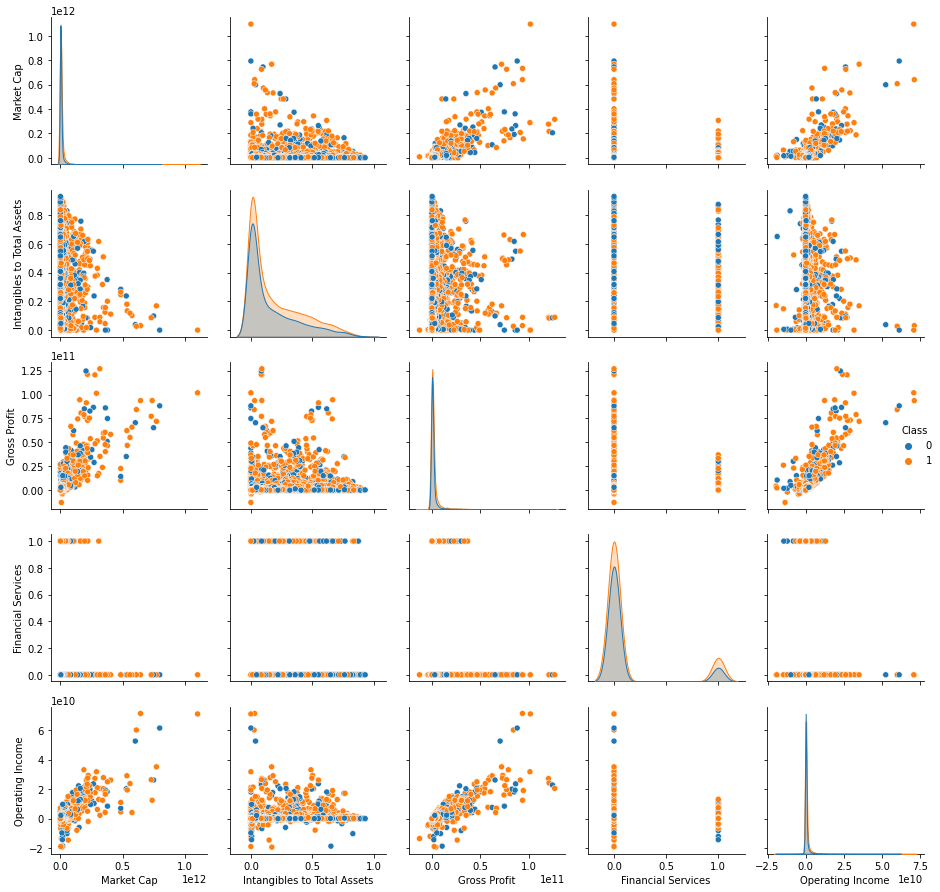

In [837]:
# Plotting most positively related cols

plt.figure(figsize=(20,12))
sns.pairplot(printThis, hue="Class")
sns.despine()
plt.tight_layout()


plt.plot()

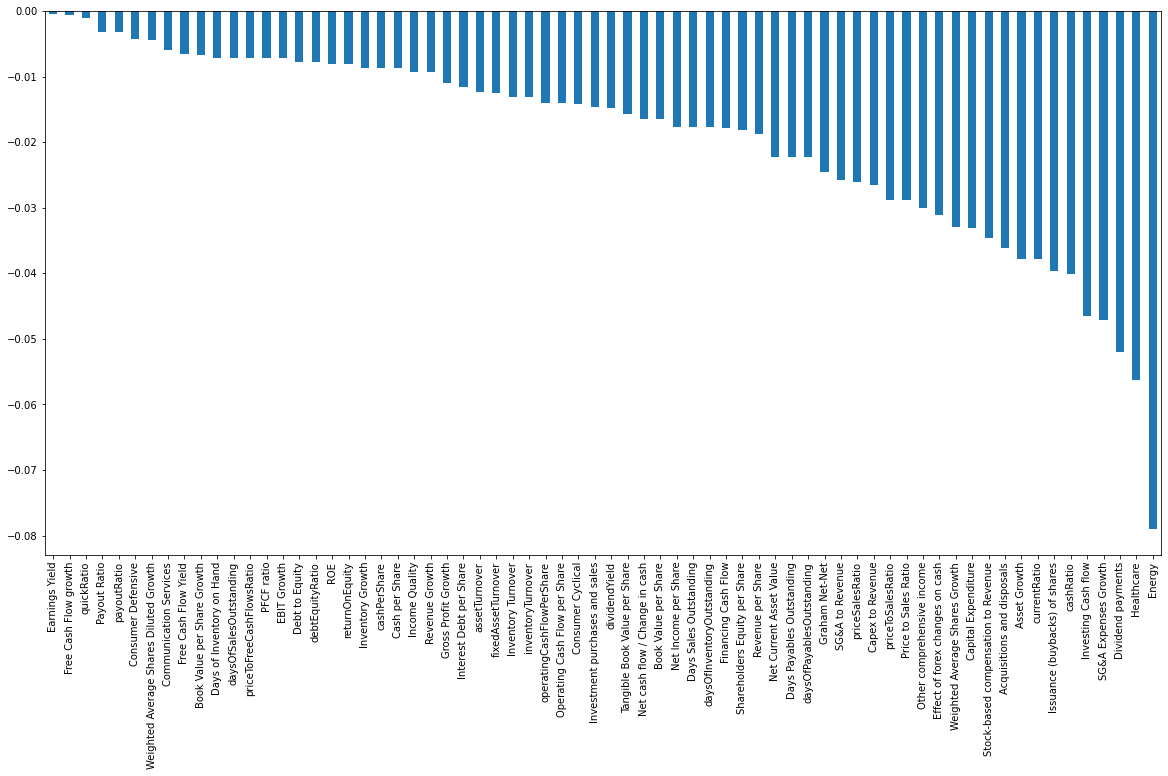

In [838]:
# Creating bar chart for showing co-relation of all variables with Class.
plt.figure(figsize=(20,10))
negative_corr.Class.plot(kind = 'bar')
plt.show()

In [839]:
negative_corr=negative_corr.reset_index()

In [840]:
negative_corr

,index,Class
0,Earnings Yield,-0.000520
1,Free Cash Flow growth,-0.000596
2,quickRatio,-0.001019
3,Payout Ratio,-0.003231
4,payoutRatio,-0.003231
...,...,...
63,Investing Cash flow,-0.046462
64,SG&A Expenses Growth,-0.047124
65,Dividend payments,-0.052046
66,Healthcare,-0.056292


In [841]:
negative_corr = negative_corr.rename(columns={"index":"col_name"})

In [842]:
negative_corr

,col_name,Class
0,Earnings Yield,-0.000520
1,Free Cash Flow growth,-0.000596
2,quickRatio,-0.001019
3,Payout Ratio,-0.003231
4,payoutRatio,-0.003231
...,...,...
63,Investing Cash flow,-0.046462
64,SG&A Expenses Growth,-0.047124
65,Dividend payments,-0.052046
66,Healthcare,-0.056292


In [843]:
top_neg_index = list(negative_corr.col_name[0:4])

In [844]:
top_neg_index

['Earnings Yield', 'Free Cash Flow growth', 'quickRatio', 'Payout Ratio']

In [845]:
printThis2 = df[top_neg_index]
printThis2['Class'] = df.Class

[]

<Figure size 1440x864 with 0 Axes>

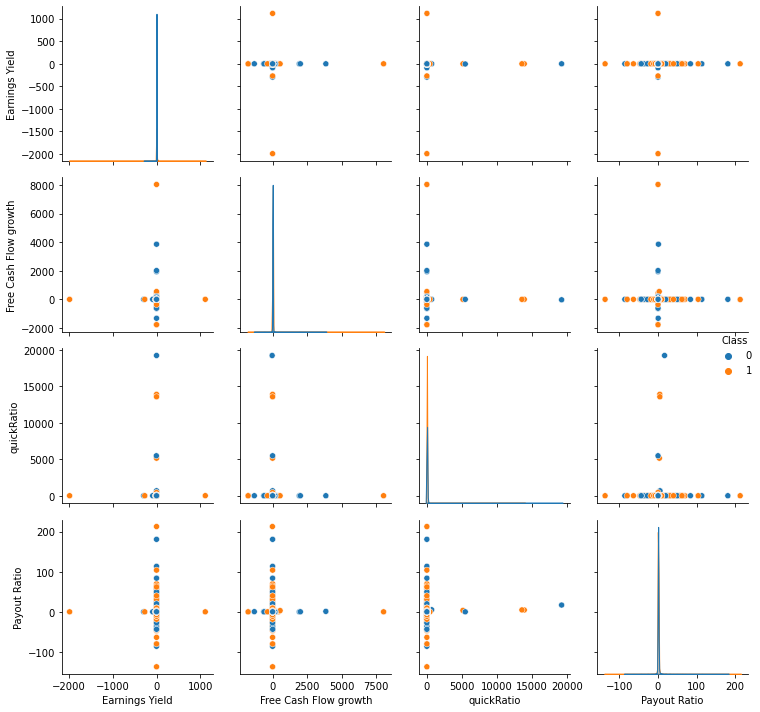

In [846]:
# Plotting most positively related cols

plt.figure(figsize=(20,12))
sns.pairplot(printThis2, hue="Class")
sns.despine()
plt.tight_layout()


plt.plot()

In [847]:
df.columns

Index(['Revenue', 'Revenue Growth', 'Cost of Revenue', 'Gross Profit',
       'SG&A Expense', 'Operating Expenses', 'Operating Income',
       'Interest Expense', 'Earnings before Tax', 'Income Tax Expense',
       ...
       'Consumer Cyclical', 'Consumer Defensive', 'Energy',
       'Financial Services', 'Healthcare', 'Industrials', 'Real Estate',
       'Technology', 'Utilities', 'Class'],
      dtype='object', length=171)

In [848]:
plotHelper = pd.DataFrame()
col_name = []
mean = []
std = []
for col in df.select_dtypes(include = np.number).columns.to_list():
    col_name.append(col)
    mean.append(df[col].mean())
    std.append(df[col].std())

In [849]:
plotHelper['col_name']=col_name
plotHelper['mean']=mean
plotHelper['std']=std

In [850]:
plotHelper

,col_name,mean,std
0,Revenue,5.189087e+09,1.954636e+10
1,Revenue Growth,5.709606e+00,4.220723e+02
2,Cost of Revenue,3.291808e+09,1.466952e+10
3,Gross Profit,1.896507e+09,6.595349e+09
4,SG&A Expense,8.718112e+08,3.405995e+09
...,...,...,...
166,Industrials,1.622936e-01,3.687368e-01
167,Real Estate,4.871560e-02,2.152827e-01
168,Technology,1.862385e-01,3.893169e-01
169,Utilities,3.027523e-02,1.713515e-01


In [851]:
plotHelper = plotHelper.loc[~(plotHelper.col_name=="Class")]

In [852]:
plotHelper

,col_name,mean,std
0,Revenue,5.189087e+09,1.954636e+10
1,Revenue Growth,5.709606e+00,4.220723e+02
2,Cost of Revenue,3.291808e+09,1.466952e+10
3,Gross Profit,1.896507e+09,6.595349e+09
4,SG&A Expense,8.718112e+08,3.405995e+09
...,...,...,...
165,Healthcare,1.421101e-01,3.491790e-01
166,Industrials,1.622936e-01,3.687368e-01
167,Real Estate,4.871560e-02,2.152827e-01
168,Technology,1.862385e-01,3.893169e-01


In [853]:
plotHelper.sort_values(by="mean", ascending=True)

,col_name,mean,std
128,Net Current Asset Value,-5.066984e+09,3.111764e+10
54,Investing Cash flow,-6.086146e+08,2.893296e+09
51,Capital Expenditure,-3.621792e+08,1.425530e+09
43,Other comprehensive income,-1.960031e+08,1.225947e+09
57,Dividend payments,-1.883602e+08,8.040302e+08
...,...,...,...
42,Total liabilities,8.785156e+09,5.406210e+10
107,Market Cap,9.394068e+09,3.649128e+10
127,Tangible Asset Value,1.006862e+10,5.814923e+10
129,Invested Capital,1.064368e+10,6.077796e+10


In [854]:
top_mean = list(plotHelper.sort_values(by="mean",ascending=False).col_name[0:5])

In [855]:
bottom_mean = list(plotHelper.sort_values(by="mean", ascending=True).col_name[0:5])

In [856]:
top_std = list(plotHelper.sort_values(by="std",ascending=False).col_name[0:5])

In [857]:
bottom_std = list(plotHelper.sort_values(by="std",ascending=True).col_name[0:5])

In [858]:
top_mean

['Total assets',
 'Invested Capital',
 'Tangible Asset Value',
 'Market Cap',
 'Total liabilities']

[]

<Figure size 1440x864 with 0 Axes>

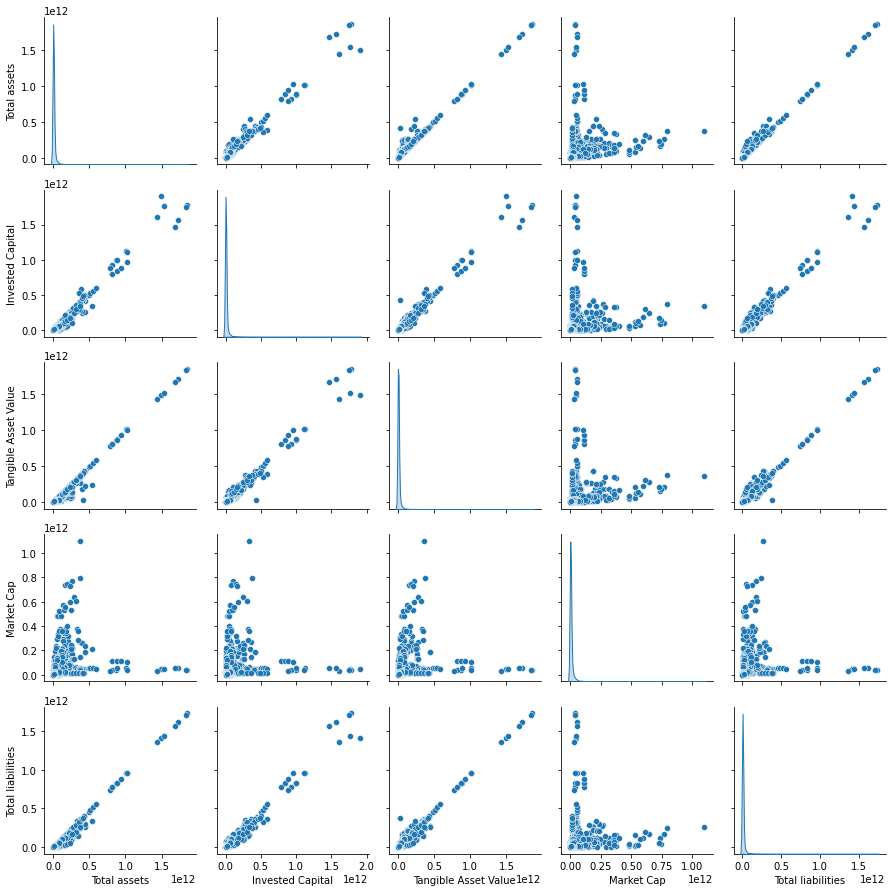

In [859]:
# Plotting cols with highest mean

plt.figure(figsize=(20,12))
sns.pairplot(df[top_mean],diag_kind='kde')
sns.despine()
plt.tight_layout()


plt.plot()

[]

<Figure size 1440x864 with 0 Axes>

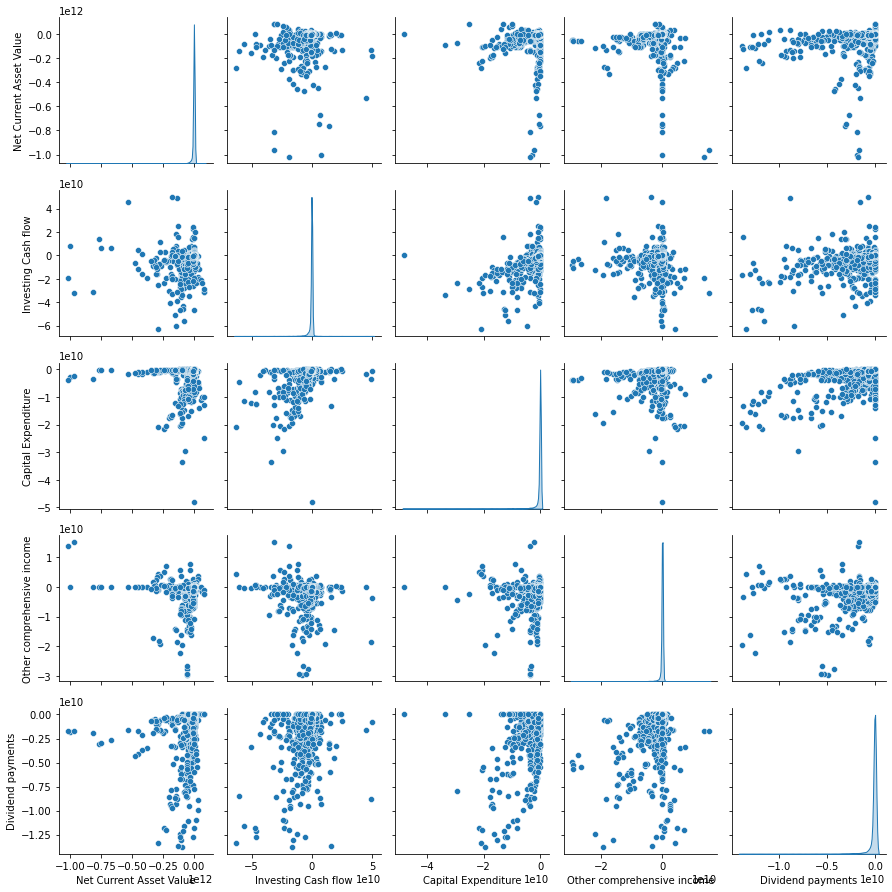

In [860]:
# Plotting with lowest mean

plt.figure(figsize=(20,12))
sns.pairplot(df[bottom_mean],diag_kind='kde')
sns.despine()
plt.tight_layout()


plt.plot()

[]

<Figure size 1440x864 with 0 Axes>

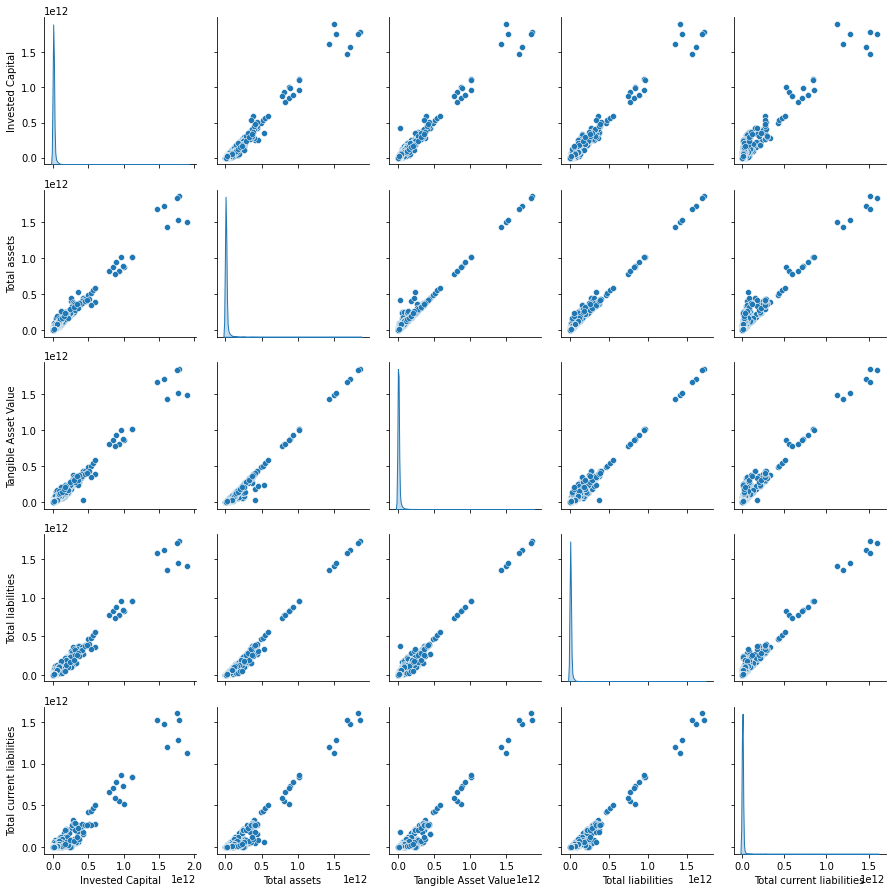

In [861]:
# Plotting cols with highest SD

plt.figure(figsize=(20,12))
sns.pairplot(df[top_std],diag_kind='kde')
sns.despine()
plt.tight_layout()


plt.plot()

[]

<Figure size 1440x864 with 0 Axes>

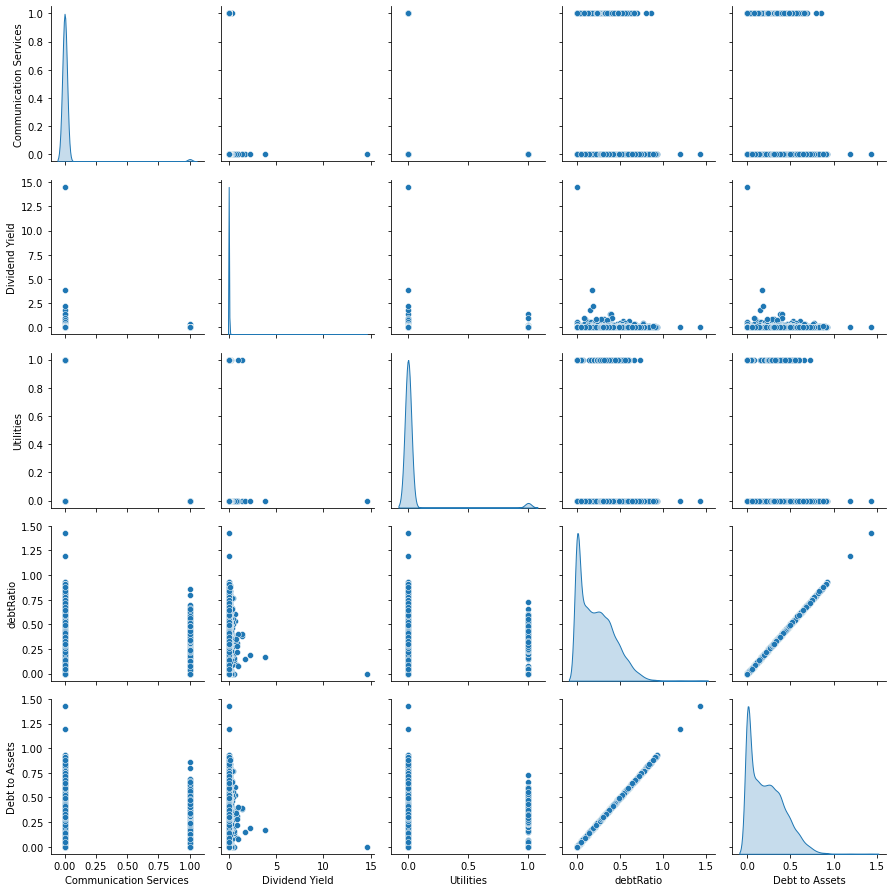

In [862]:
# Plotting cols with lowest SD

plt.figure(figsize=(20,12))
sns.pairplot(df[bottom_std],diag_kind='kde')
sns.despine()
plt.tight_layout()


plt.plot()

In [863]:
top_mean

['Total assets',
 'Invested Capital',
 'Tangible Asset Value',
 'Market Cap',
 'Total liabilities']

[]

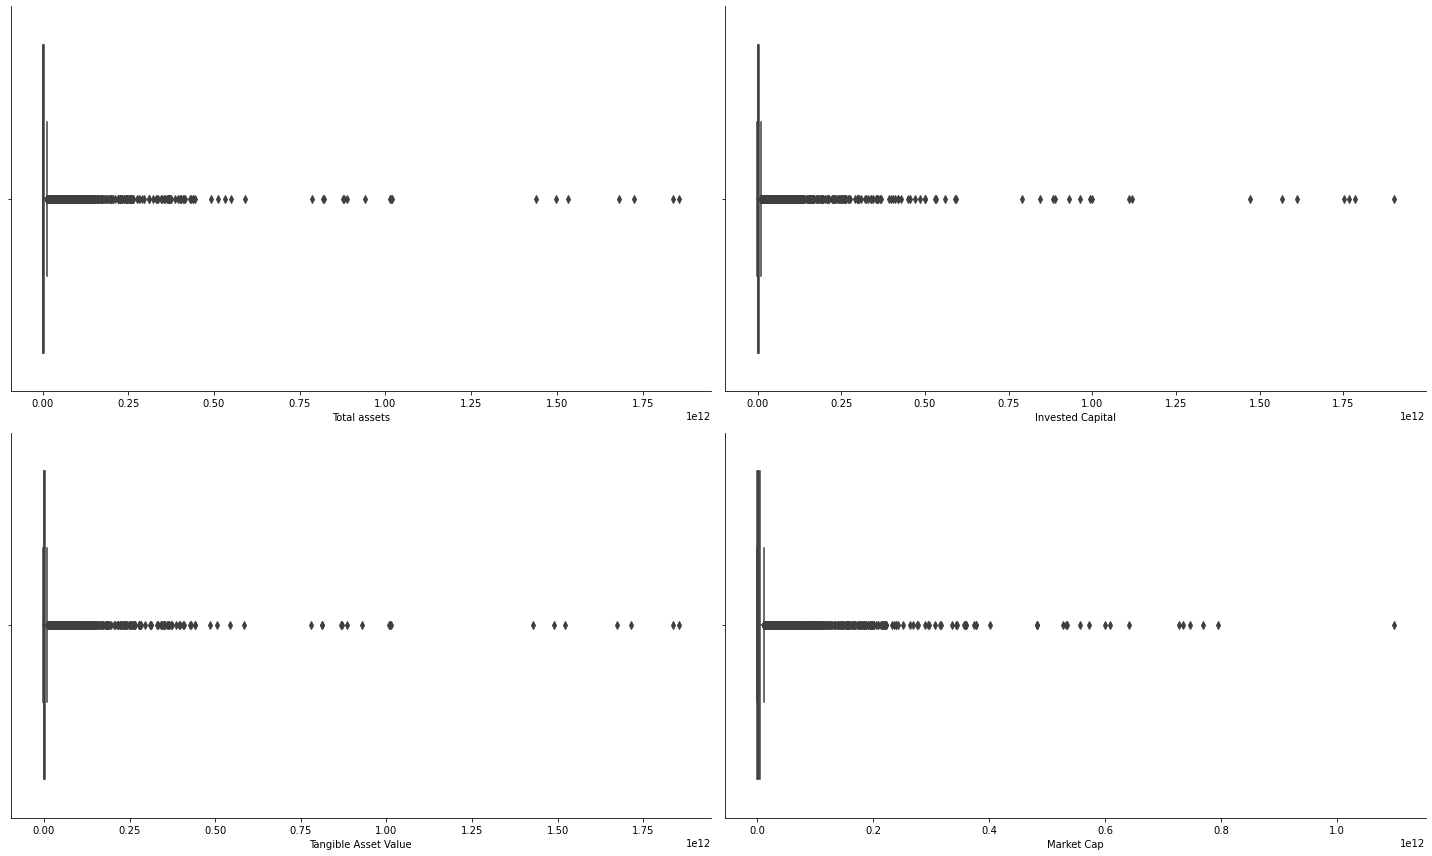

In [864]:
fig = plt.figure(figsize=(20,12))

ax0=fig.add_subplot(2,2,1)
ax1=fig.add_subplot(2,2,2)
ax2=fig.add_subplot(2,2,3)
ax3=fig.add_subplot(2,2,4)

sns.boxplot(df[top_mean[0]], data=df, ax=ax0)
sns.boxplot(df[top_mean[1]], data=df, ax=ax1)
sns.boxplot(df[top_mean[2]], data=df, ax=ax2)
sns.boxplot(df[top_mean[3]], data=df, ax=ax3)

sns.despine()
plt.tight_layout()
plt.plot()

[]

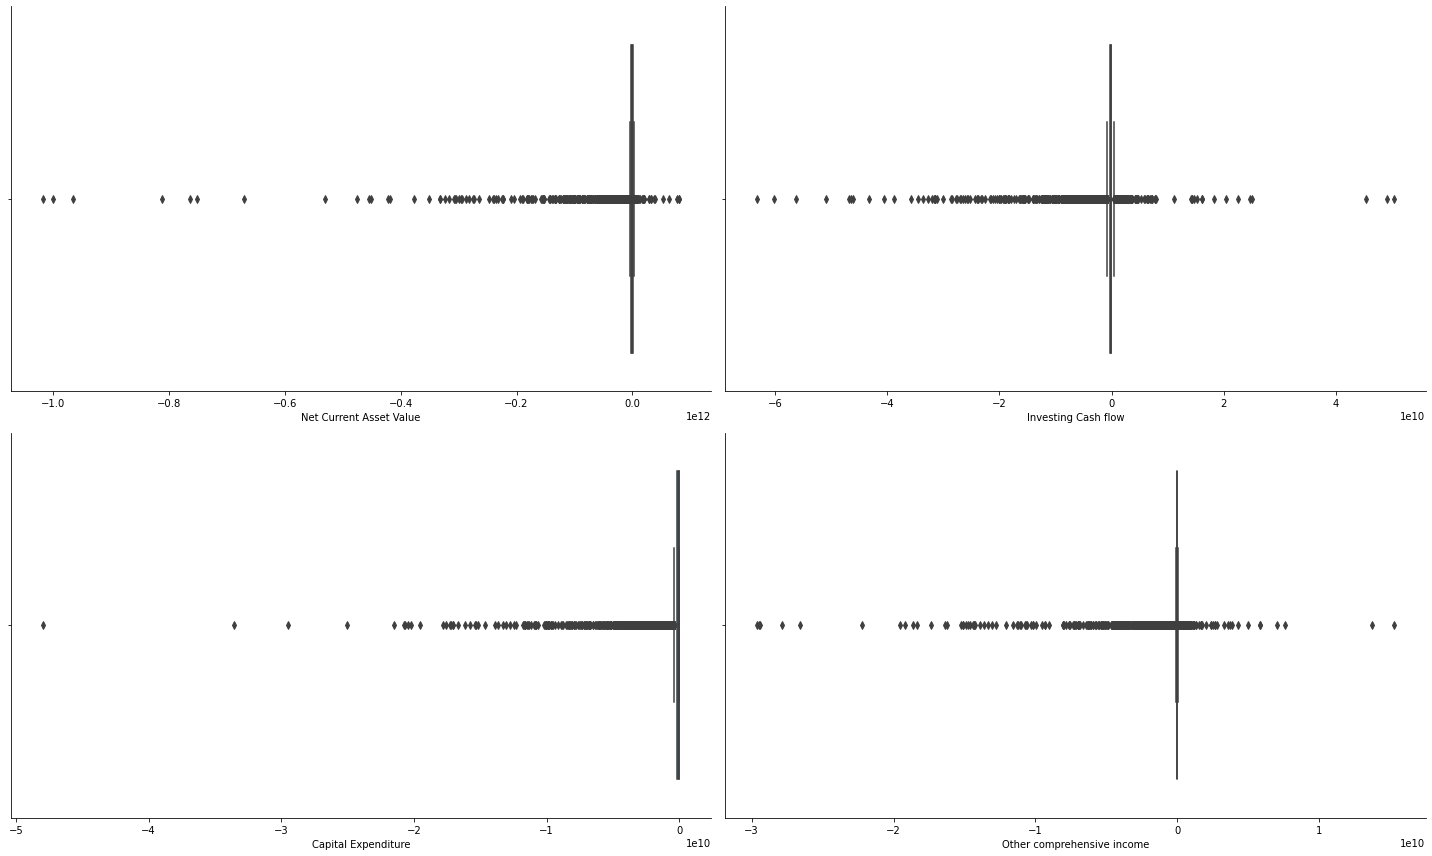

In [865]:
fig = plt.figure(figsize=(20,12))

ax0=fig.add_subplot(2,2,1)
ax1=fig.add_subplot(2,2,2)
ax2=fig.add_subplot(2,2,3)
ax3=fig.add_subplot(2,2,4)

sns.boxplot(df[bottom_mean[0]], data=df, ax=ax0)
sns.boxplot(df[bottom_mean[1]], data=df, ax=ax1)
sns.boxplot(df[bottom_mean[2]], data=df, ax=ax2)
sns.boxplot(df[bottom_mean[3]], data=df, ax=ax3)

sns.despine()
plt.tight_layout()
plt.plot()

[]

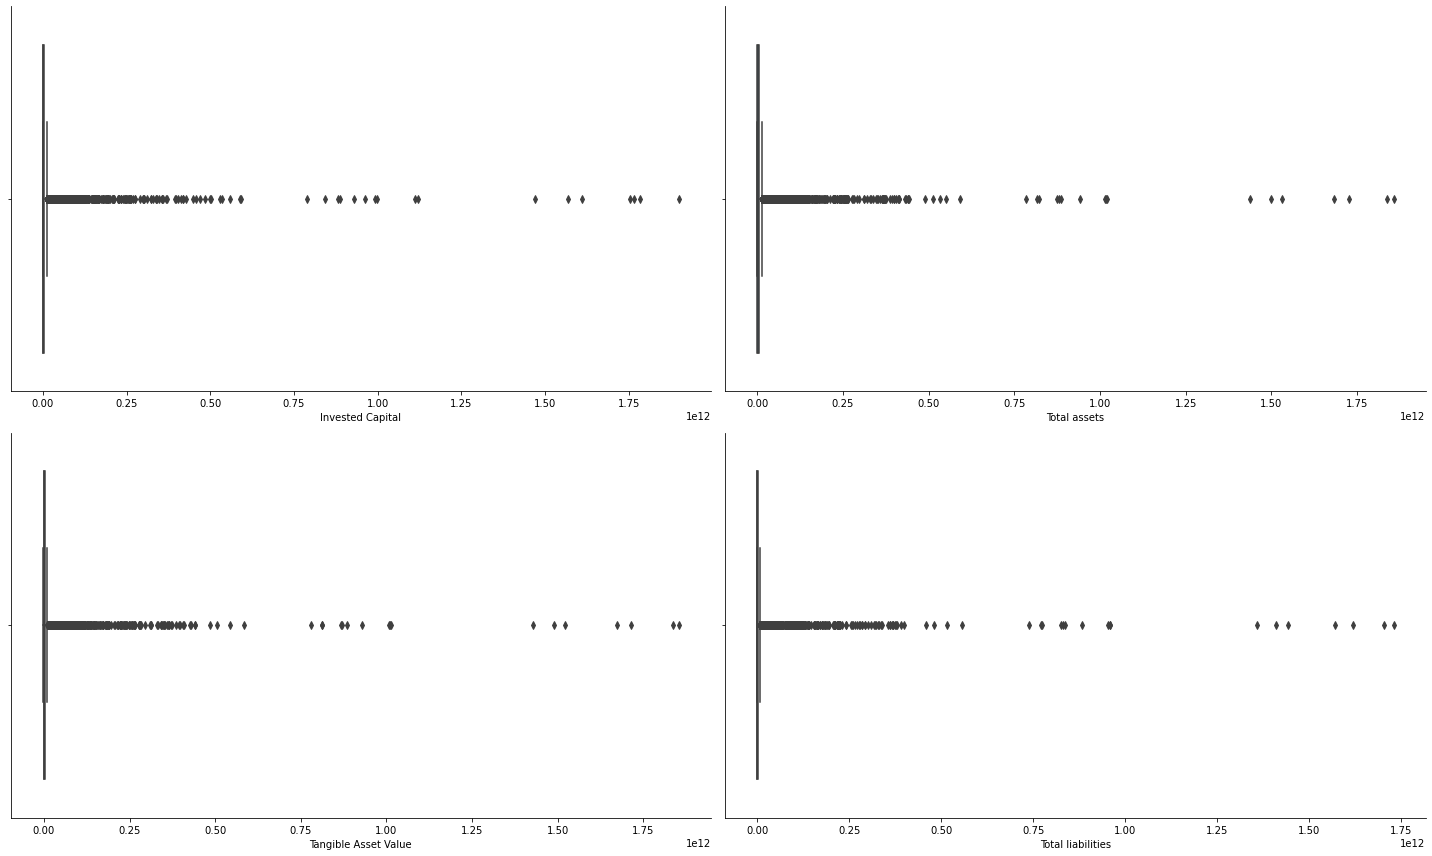

In [866]:
fig = plt.figure(figsize=(20,12))

ax0=fig.add_subplot(2,2,1)
ax1=fig.add_subplot(2,2,2)
ax2=fig.add_subplot(2,2,3)
ax3=fig.add_subplot(2,2,4)

sns.boxplot(df[top_std[0]], data=df, ax=ax0)
sns.boxplot(df[top_std[1]], data=df, ax=ax1)
sns.boxplot(df[top_std[2]], data=df, ax=ax2)
sns.boxplot(df[top_std[3]], data=df, ax=ax3)

sns.despine()
plt.tight_layout()
plt.plot()

[]

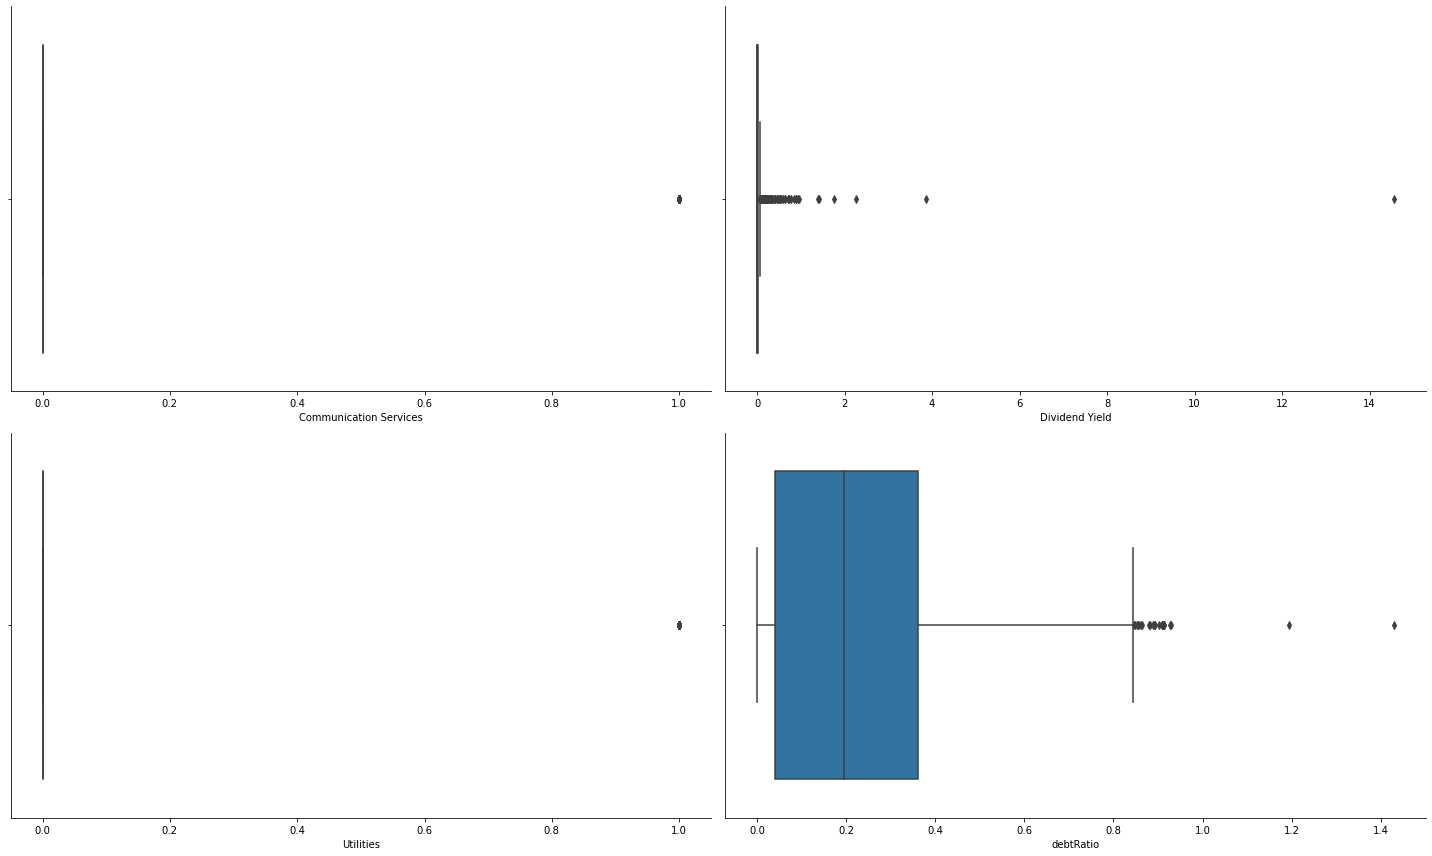

In [867]:
fig = plt.figure(figsize=(20,12))

ax0=fig.add_subplot(2,2,1)
ax1=fig.add_subplot(2,2,2)
ax2=fig.add_subplot(2,2,3)
ax3=fig.add_subplot(2,2,4)

sns.boxplot(df[bottom_std[0]], data=df, ax=ax0)
sns.boxplot(df[bottom_std[1]], data=df, ax=ax1)
sns.boxplot(df[bottom_std[2]], data=df, ax=ax2)
sns.boxplot(df[bottom_std[3]], data=df, ax=ax3)

sns.despine()
plt.tight_layout()
plt.plot()

In [868]:
df.corr()['Class'].sort_values(ascending=False).head(20)

Class                             1.000000
Utilities                         0.070412
Market Cap                        0.058688
Intangibles to Total Assets       0.055822
Gross Profit                      0.055168
Financial Services                0.054876
Operating Income                  0.053494
EBIT                              0.053059
EBITDA                            0.051676
Earnings before Tax               0.050998
Net Income Com                    0.050622
Net Income                        0.049682
longtermDebtToCapitalization      0.049374
Consolidated Income               0.048693
Operating Expenses                0.048676
SG&A Expense                      0.048311
Operating Cash Flow               0.046758
Total shareholders equity         0.045899
Stock-based compensation          0.045046
Goodwill and Intangible Assets    0.043145
Name: Class, dtype: float64

In [869]:
df.corr()['Class'].sort_values(ascending=False).tail(20)

SG&A to Revenue                       -0.025694
priceSalesRatio                       -0.026047
Capex to Revenue                      -0.026532
priceToSalesRatio                     -0.028775
Price to Sales Ratio                  -0.028775
Other comprehensive income            -0.030051
Effect of forex changes on cash       -0.031049
Weighted Average Shares Growth        -0.032928
Capital Expenditure                   -0.033031
Stock-based compensation to Revenue   -0.034574
Acquisitions and disposals            -0.036190
Asset Growth                          -0.037812
currentRatio                          -0.037885
Issuance (buybacks) of shares         -0.039701
cashRatio                             -0.040160
Investing Cash flow                   -0.046462
SG&A Expenses Growth                  -0.047124
Dividend payments                     -0.052046
Healthcare                            -0.056292
Energy                                -0.078968
Name: Class, dtype: float64

In [870]:
list(df.corr()['Class'].sort_values(ascending=False).index[1:5])

['Utilities', 'Market Cap', 'Intangibles to Total Assets', 'Gross Profit']

[]

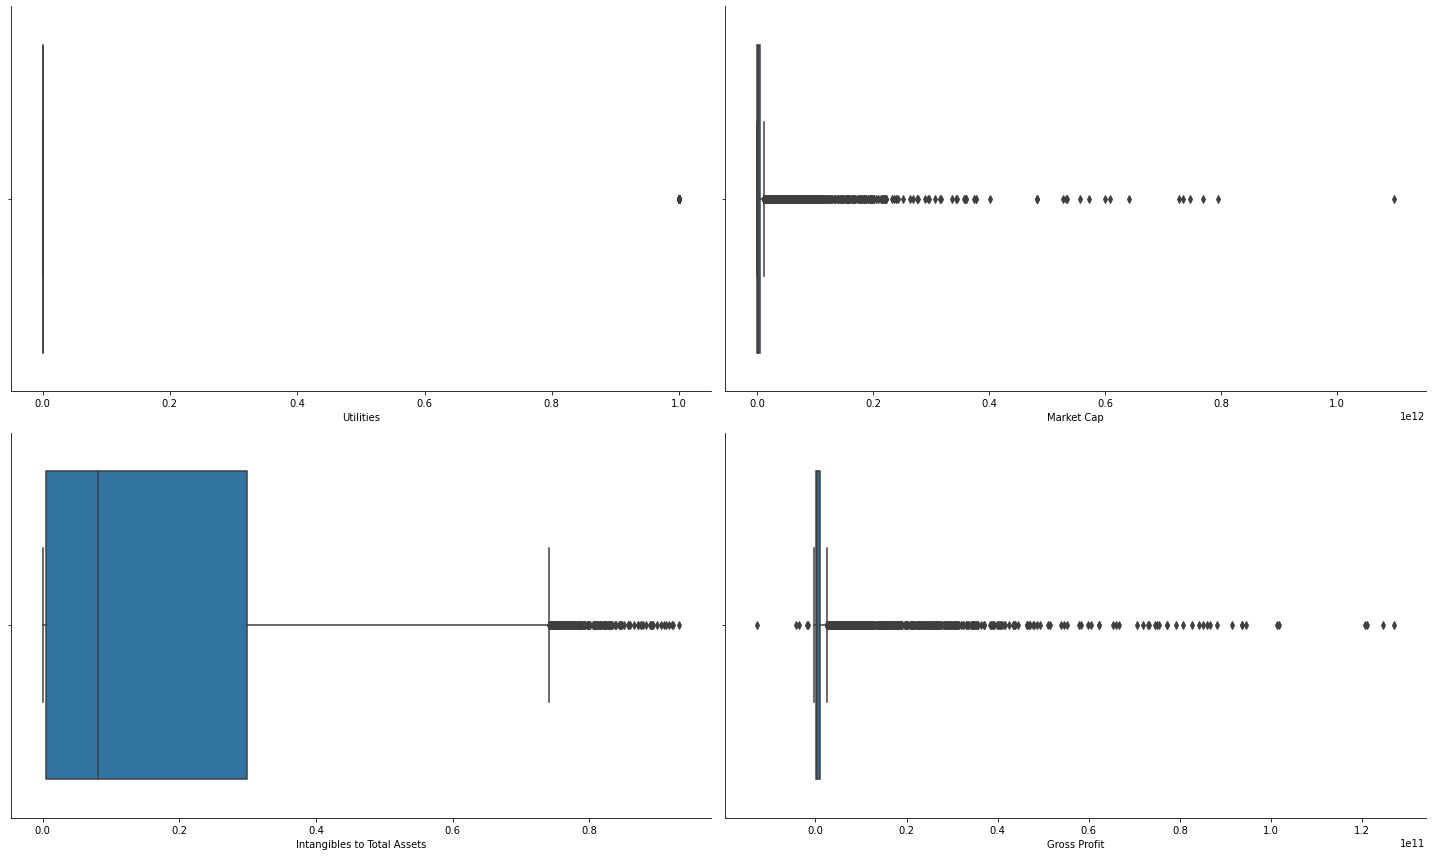

In [871]:
hig_pos_corr = list(df.corr()['Class'].sort_values(ascending=False).index[1:5])

fig = plt.figure(figsize=(20,12))

ax0=fig.add_subplot(2,2,1)
ax1=fig.add_subplot(2,2,2)
ax2=fig.add_subplot(2,2,3)
ax3=fig.add_subplot(2,2,4)

sns.boxplot(df[hig_pos_corr[0]], hue="Class", data=df, ax=ax0)
sns.boxplot(df[hig_pos_corr[1]], hue="Class", data=df, ax=ax1)
sns.boxplot(df[hig_pos_corr[2]], hue="Class", data=df, ax=ax2)
sns.boxplot(df[hig_pos_corr[3]], hue="Class", data=df, ax=ax3)

sns.despine()
plt.tight_layout()
plt.plot()

In [872]:
hig_neg_corr = list(df.corr()['Class'].sort_values(ascending=True).index[0:7])

In [873]:
hig_neg_corr

['Energy',
 'Healthcare',
 'Dividend payments',
 'SG&A Expenses Growth',
 'Investing Cash flow',
 'cashRatio',
 'Issuance (buybacks) of shares']

In [874]:
hig_neg_corr.remove('Energy')

In [875]:
hig_neg_corr.remove('Healthcare')

[]

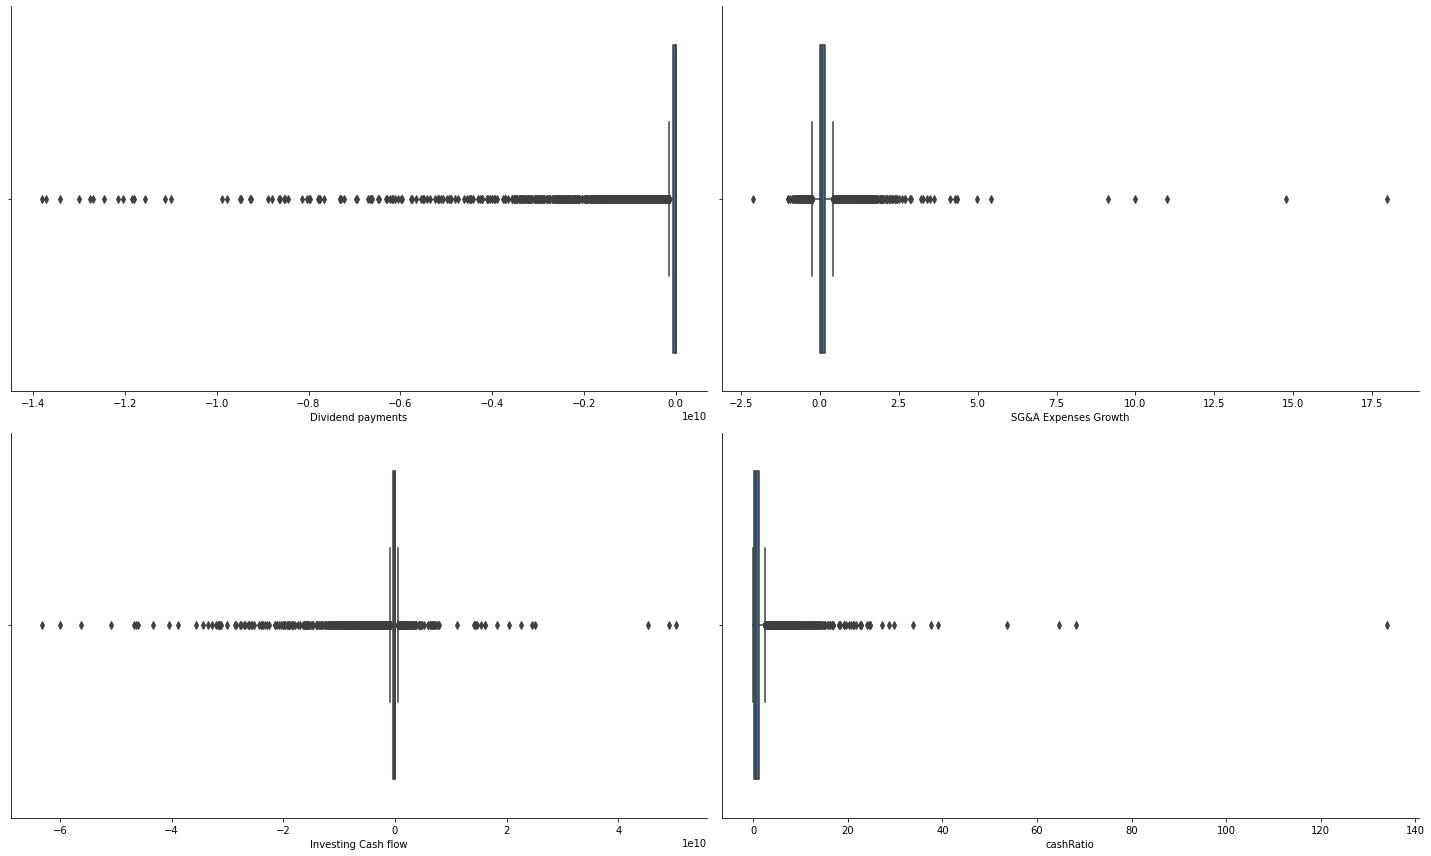

In [876]:
# hig_neg_corr = list(df.corr()['Class'].sort_values(ascending=True).index[0:5])

fig = plt.figure(figsize=(20,12))

ax0=fig.add_subplot(2,2,1)
ax1=fig.add_subplot(2,2,2)
ax2=fig.add_subplot(2,2,3)
ax3=fig.add_subplot(2,2,4)

sns.boxplot(df[hig_neg_corr[0]], hue="Class", data=df, ax=ax0)
sns.boxplot(df[hig_neg_corr[1]], hue="Class", data=df, ax=ax1)
sns.boxplot(df[hig_neg_corr[2]], hue="Class", data=df, ax=ax2)
sns.boxplot(df[hig_neg_corr[3]], hue="Class", data=df, ax=ax3)

sns.despine()
plt.tight_layout()
plt.plot()

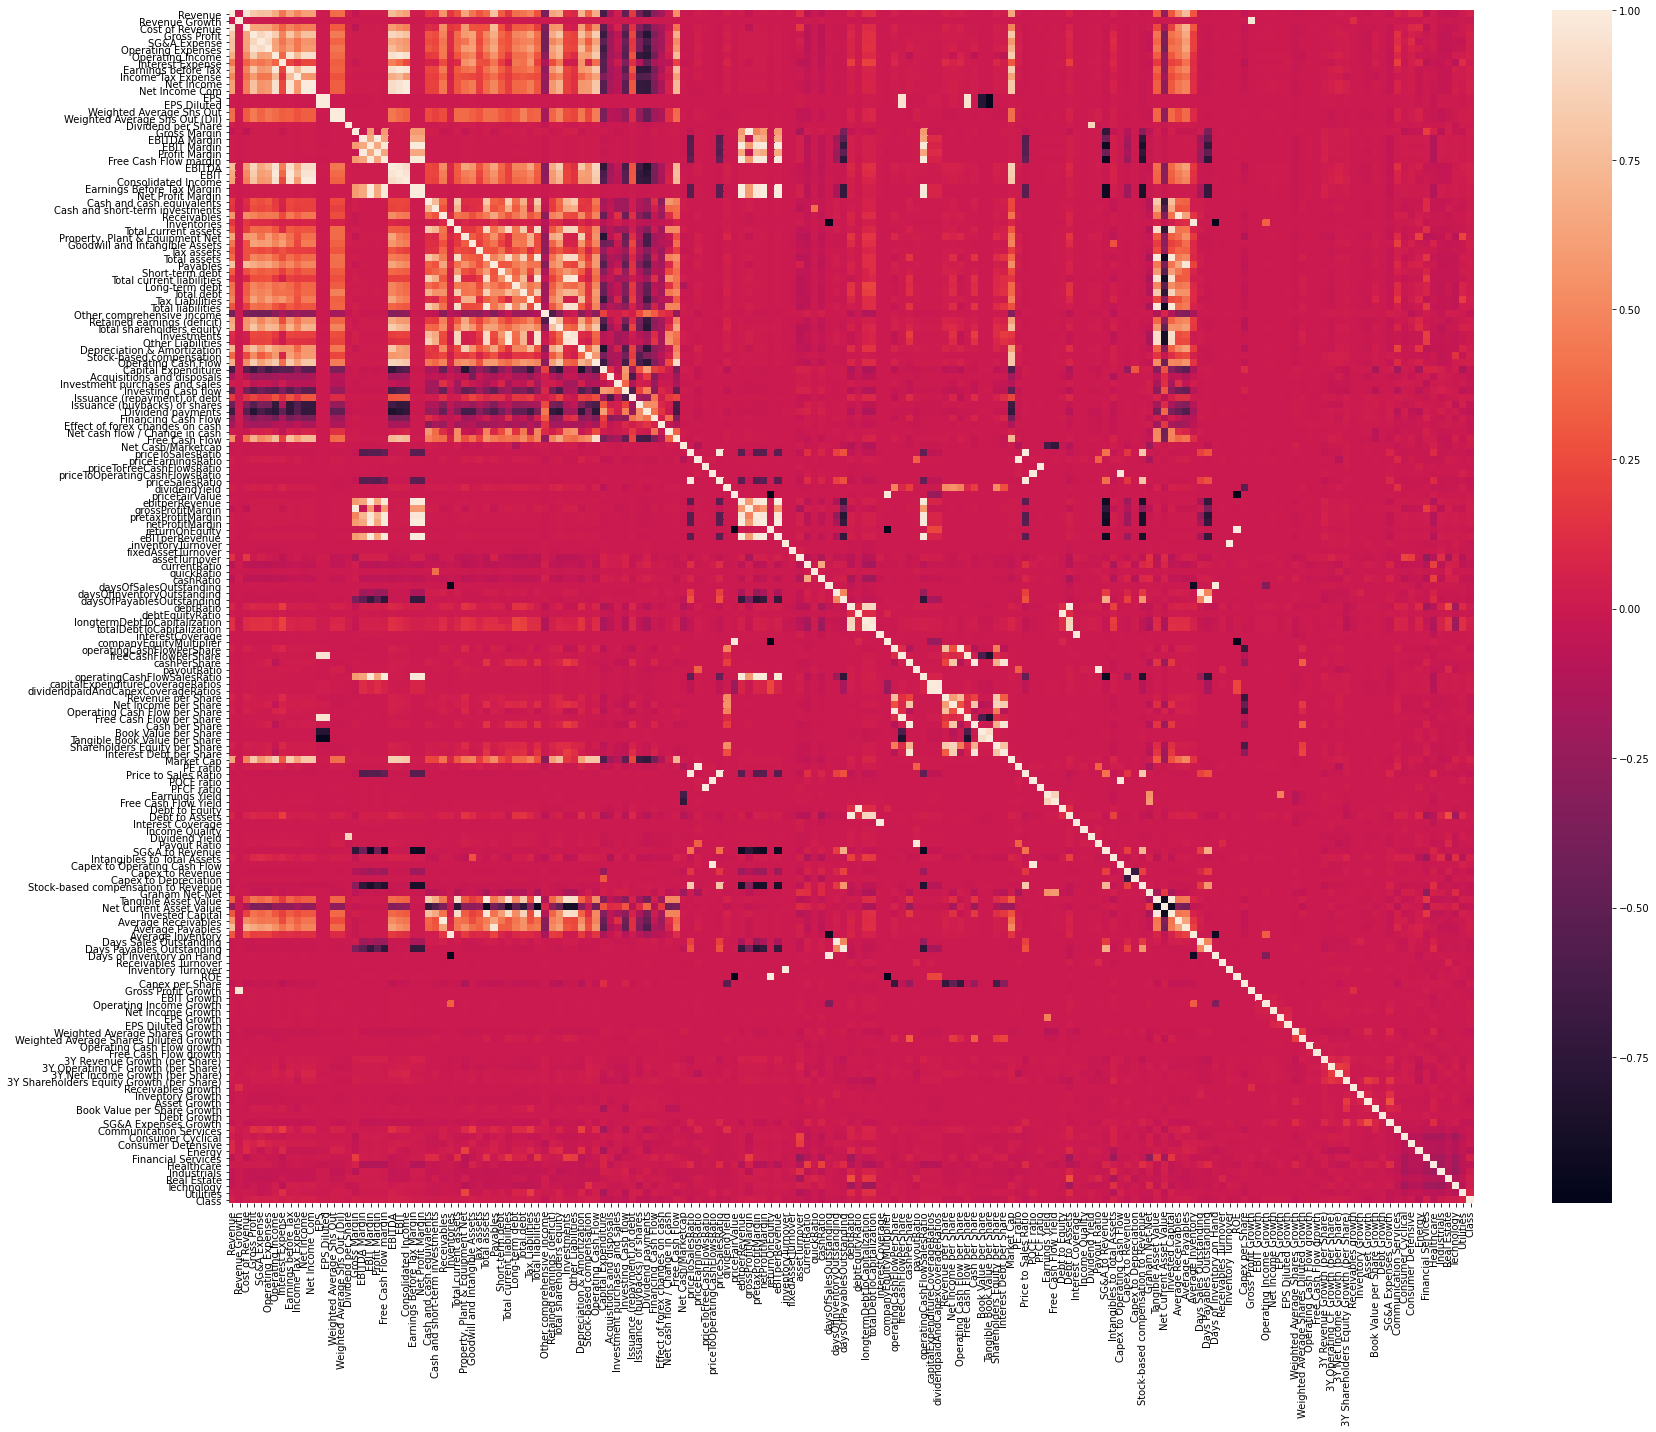

In [907]:
# Plotting the co-relation matrix for the data frame.
plt.figure(figsize = (25, 20))

ax=sns.heatmap(df.corr(),xticklabels=True, yticklabels=True)

# sns.despine()
plt.tight_layout()

plt.show()


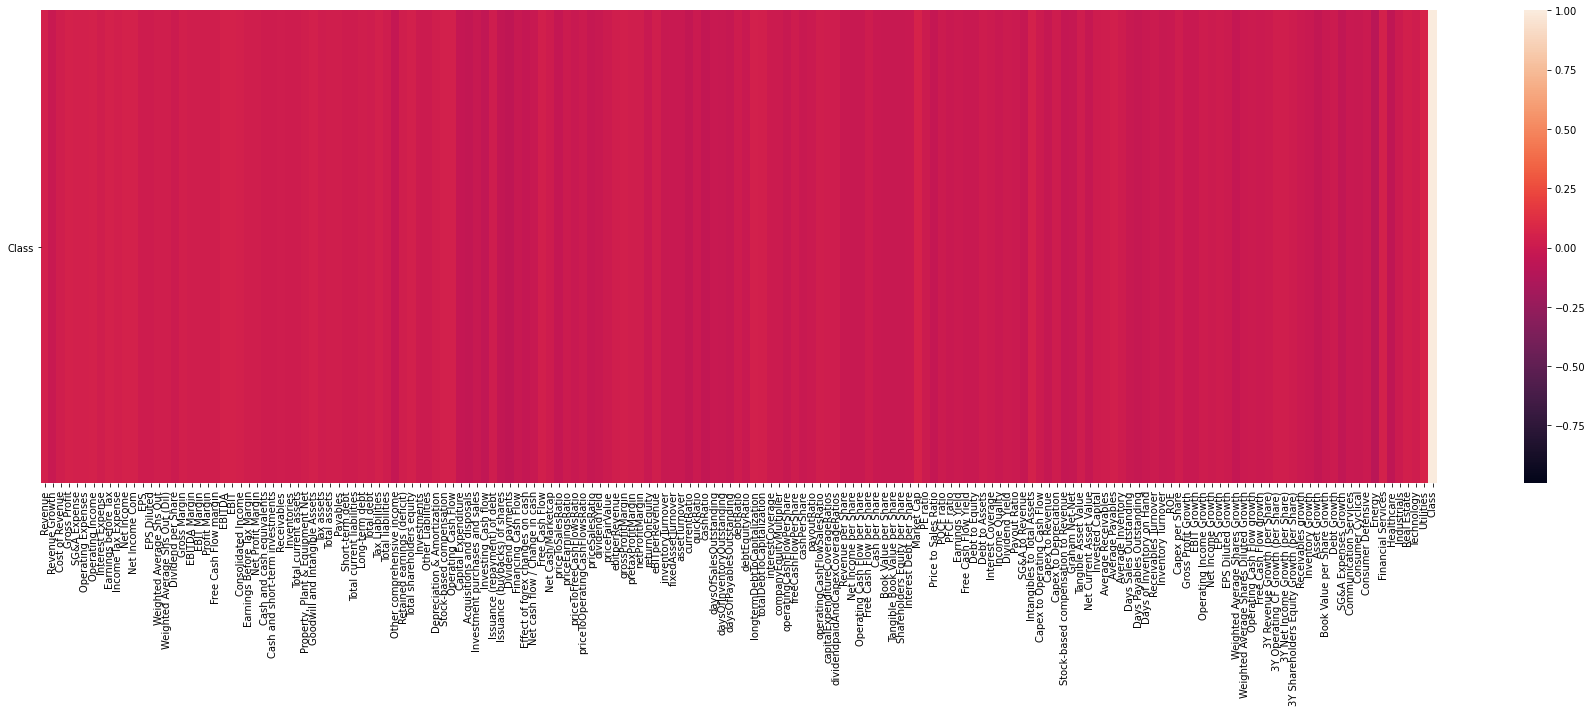

In [922]:

# Plotting the co-relation matrix for the data frame.
plt.figure(figsize = (25, 10))

ax=sns.heatmap(data.corr().iloc[::-1],xticklabels=True, yticklabels=True)
ax.set_ylim(1,0)
# ax.set_xlim(5,0)
# sns.despine()
plt.tight_layout()

plt.show()


In [878]:
sector_list.remove("Basic Materials")

In [879]:
df[sector_list]

,Consumer Defensive,Healthcare,Consumer Cyclical,Industrials,Real Estate,Communication Services,Energy,Financial Services,Utilities,Technology
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
11,1,0,0,0,0,0,0,0,0,0
12,1,0,0,0,0,0,0,0,0,0
13,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
18682,0,0,0,0,0,0,0,1,0,0
18691,0,0,0,0,0,0,0,0,0,1
18693,0,0,0,0,0,0,0,0,0,1
18695,0,0,0,0,0,0,0,0,0,1


In [880]:
len(sector_list)

10

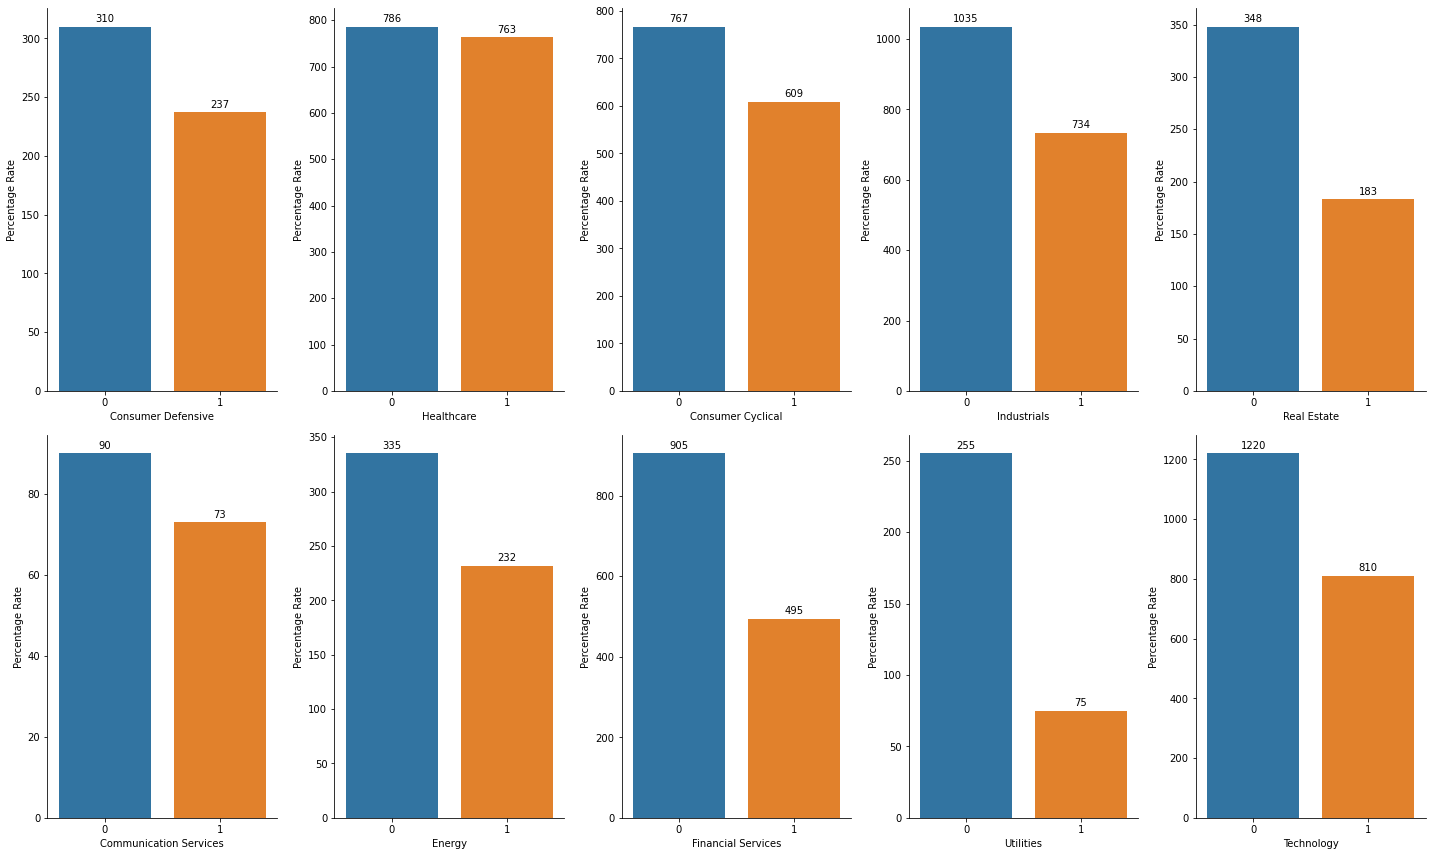

In [900]:
# Univariate Plot Analysis of Ordered categorical variables vs Percentage Rate
counter = 1

plt.figure(figsize=(20, 12))
for col_list in sector_list:
    df1 = df.loc[df[col_list]==1]
    series = round(((df[col_list].value_counts()) / (len(df[col_list])) * 100),
                   2)
    meraY = df.loc[df[col_list]==1].Class.value_counts().values

    plt.subplot(2, 5, counter)
    ax = sns.barplot(x=series.index,
                     y=meraY,
                     order=series.sort_index().index)
    plt.xlabel(col_list)
    plt.ylabel('Percentage Rate')

    annotate_graph(ax)
    counter += 1

sns.despine()
plt.tight_layout()
plt.show()

# Outlier Treatment

In [521]:
df.head()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,...,Consumer Cyclical,Consumer Defensive,Energy,Financial Services,Healthcare,Industrials,Real Estate,Technology,Utilities,Class
3,6.505800e+10,-0.0037,3.263800e+10,3.242000e+10,1.865400e+10,1.865400e+10,1.376600e+10,465000000.0,1.838900e+10,3.063000e+09,...,0,1,0,0,0,0,0,0,0,1
4,6.683200e+10,0.0273,3.443200e+10,3.240000e+10,1.903700e+10,1.903700e+10,1.336300e+10,506000000.0,1.321500e+10,3.465000e+09,...,0,1,0,0,0,0,0,0,0,1
11,1.084650e+11,0.1026,8.551200e+10,2.295300e+10,1.716100e+10,1.981600e+10,3.137000e+09,488000000.0,2.630000e+09,9.020000e+08,...,0,1,0,0,0,0,0,0,0,0
12,1.098300e+11,0.0126,8.549600e+10,2.433400e+10,1.794600e+10,2.075800e+10,3.576000e+09,482000000.0,3.084000e+09,1.045000e+09,...,0,1,0,0,0,0,0,0,0,0
13,1.153370e+11,0.0501,8.950200e+10,2.583500e+10,1.916200e+10,2.238300e+10,3.452000e+09,522000000.0,2.932000e+09,9.570000e+08,...,0,1,0,0,0,0,0,0,0,0


## Method 1 Standard Deviation Method

Three standard deviations from the mean is a common cut-off in practice for identifying outliers in a Gaussian or Gaussian-like distribution. For smaller samples of data, perhaps a value of 2 standard deviations (95%) can be used, and for larger samples, perhaps a value of 4 standard deviations (99.9%) can be used.

In [522]:
df.shape

(10900, 171)

In [523]:
# Extracting numerical columns from the telecom_df data frame.
numerical_cols = df.select_dtypes(include = np.number).columns.to_list()

In [524]:
# calculate summary statistics
data = df[numerical_cols]
data_mean, data_std = np.mean(data), np.std(data)
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = df[((df < lower) | (df > upper)).any(axis=1)]
print('Number of identified outliers: %d' % len(outliers))

Number of identified outliers: 3751


In [525]:
# remove outliers
outliers_removed = df[~((df < lower) | (df > upper)).any(axis=1)]
print('Non-outlier observations: %d' % len(outliers_removed))

Non-outlier observations: 7149


## Method 2 IQR method

The IQR can be used to identify outliers by defining limits on the sample values that are a factor k of the IQR below the 25th percentile or above the 75th percentile. The common value for the factor k is the value 1.5.

In [526]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Revenue            2.809470e+09
Revenue Growth     1.816000e-01
Cost of Revenue    1.493900e+09
Gross Profit       1.017789e+09
SG&A Expense       4.232282e+08
                       ...     
Industrials        0.000000e+00
Real Estate        0.000000e+00
Technology         0.000000e+00
Utilities          0.000000e+00
Class              1.000000e+00
Length: 171, dtype: float64


In [527]:
outliers_removed_IQR = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print('Non-outlier observations: %d' % len(outliers_removed_IQR))

Non-outlier observations: 10


## Method 3:  99-1 percentile method

In [528]:
Q1 = df.quantile(0.01)
Q3 = df.quantile(0.99)
IQR = Q3 - Q1
print(IQR)

Revenue            9.004181e+10
Revenue Growth     4.055284e+00
Cost of Revenue    6.188635e+10
Gross Profit       3.026589e+10
SG&A Expense       1.467699e+10
                       ...     
Industrials        1.000000e+00
Real Estate        1.000000e+00
Technology         1.000000e+00
Utilities          1.000000e+00
Class              1.000000e+00
Length: 171, dtype: float64


In [529]:
outliers_removed_IQR = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print('Non-outlier observations: %d' % len(outliers_removed_IQR))

Non-outlier observations: 9186


In [530]:
### We choose 99-1 percentile method for outlier treatment
df_99_1 = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [531]:
df_99_1.shape

(9186, 171)

## Method 4:  95-5 percentile method

In [532]:
Q1 = df.quantile(0.05)
Q3 = df.quantile(0.95)
IQR = Q3 - Q1

In [533]:
outliers_removed_IQR = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print('Non-outlier observations: %d' % len(outliers_removed_IQR))

Non-outlier observations: 4915


In [534]:
### We choose 95-5 percentile method for outlier treatment
df_95_5 = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [535]:
df_95_5.shape

(4915, 171)

In [536]:
# Selecting 99-1 percentile

In [537]:
df = df_99_1

# Observation

We are losing a lot of data even if we perform 99-1 percentile outlier removal. Therefore, we need to explore other techniques

In [538]:
df.head()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,...,Consumer Cyclical,Consumer Defensive,Energy,Financial Services,Healthcare,Industrials,Real Estate,Technology,Utilities,Class
11,1.084650e+11,0.1026,8.551200e+10,2.295300e+10,1.716100e+10,1.981600e+10,3.137000e+09,488000000.0,2.630000e+09,9.020000e+08,...,0,1,0,0,0,0,0,0,0,0
12,1.098300e+11,0.0126,8.549600e+10,2.433400e+10,1.794600e+10,2.075800e+10,3.576000e+09,482000000.0,3.084000e+09,1.045000e+09,...,0,1,0,0,0,0,0,0,0,0
13,1.153370e+11,0.0501,8.950200e+10,2.583500e+10,1.916200e+10,2.238300e+10,3.452000e+09,522000000.0,2.932000e+09,9.570000e+08,...,0,1,0,0,0,0,0,0,0,0
14,1.226620e+11,0.0635,9.566200e+10,2.700000e+10,2.104100e+10,2.438800e+10,2.612000e+09,601000000.0,1.502000e+09,-4.050000e+08,...,0,1,0,0,0,0,0,0,0,1
22,1.656310e+10,-0.0605,1.073360e+10,5.829500e+09,3.118900e+09,3.270300e+09,2.559200e+09,303800000.0,2.452600e+09,7.552000e+08,...,0,1,0,0,0,0,0,0,0,0


In [539]:
(df.isnull().sum() * 100 / len(df)).sort_values(ascending=False)

Revenue                            0.0
Income Quality                     0.0
Price to Sales Ratio               0.0
POCF ratio                         0.0
PFCF ratio                         0.0
                                  ... 
Financing Cash Flow                0.0
Effect of forex changes on cash    0.0
Net cash flow / Change in cash     0.0
Free Cash Flow                     0.0
Class                              0.0
Length: 171, dtype: float64

In [540]:
df.shape

(9186, 171)

# Winsorize

In [541]:
sorted(sector_list)

['Basic Materials',
 'Communication Services',
 'Consumer Cyclical',
 'Consumer Defensive',
 'Energy',
 'Financial Services',
 'Healthcare',
 'Industrials',
 'Real Estate',
 'Technology',
 'Utilities']

In [542]:
df_winow = pd.DataFrame()
for col in df:
    if (col not in sector_list):
        df_winow[col] = winsorize(df[col], (0.1, 0.1))
    else:
        df_winow[col] = df[col].values

In [543]:
df_winow.shape

(9186, 171)

In [544]:
df['Communication Services'].value_counts()

0    9068
1     118
Name: Communication Services, dtype: int64

In [545]:
df_winow.shape

(9186, 171)

In [546]:
df_winow

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,...,Consumer Cyclical,Consumer Defensive,Energy,Financial Services,Healthcare,Industrials,Real Estate,Technology,Utilities,Class
0,9.048000e+09,0.1026,5.666802e+09,3.160000e+09,1.379600e+09,2.073000e+09,1.065000e+09,189000000.0,940000000.0,223234000.0,...,0,1,0,0,0,0,0,0,0,0
1,9.048000e+09,0.0126,5.666802e+09,3.160000e+09,1.379600e+09,2.073000e+09,1.065000e+09,189000000.0,940000000.0,223234000.0,...,0,1,0,0,0,0,0,0,0,0
2,9.048000e+09,0.0501,5.666802e+09,3.160000e+09,1.379600e+09,2.073000e+09,1.065000e+09,189000000.0,940000000.0,223234000.0,...,0,1,0,0,0,0,0,0,0,0
3,9.048000e+09,0.0635,5.666802e+09,3.160000e+09,1.379600e+09,2.073000e+09,1.065000e+09,189000000.0,940000000.0,-4026000.0,...,0,1,0,0,0,0,0,0,0,1
4,9.048000e+09,-0.0605,5.666802e+09,3.160000e+09,1.379600e+09,2.073000e+09,1.065000e+09,189000000.0,940000000.0,223234000.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9181,1.543300e+09,0.0527,1.033200e+09,5.101000e+08,8.790000e+07,1.917000e+08,3.184000e+08,49300000.0,683600000.0,2000000.0,...,0,0,1,0,0,0,0,0,0,0
9182,8.271740e+08,0.3453,6.392980e+08,1.878760e+08,7.599300e+07,2.158220e+08,-2.572100e+07,22315000.0,-38557000.0,2375000.0,...,0,0,1,0,0,0,0,0,0,0
9183,4.134120e+08,0.0092,2.405600e+08,1.728520e+08,3.000500e+07,5.833300e+07,1.145190e+08,20694000.0,84911000.0,21207000.0,...,0,0,0,1,0,0,0,0,0,1
9184,3.762200e+07,0.3446,2.569266e+07,1.769800e+07,1.072100e+07,2.053858e+07,-3.175589e+06,65693.0,-2533062.0,-1396784.0,...,0,0,0,0,0,0,0,1,0,0


In [547]:
df_winow.Utilities.value_counts()

0    8881
1     305
Name: Utilities, dtype: int64

In [548]:
df_winow.Energy.value_counts()

0    8708
1     478
Name: Energy, dtype: int64

[]

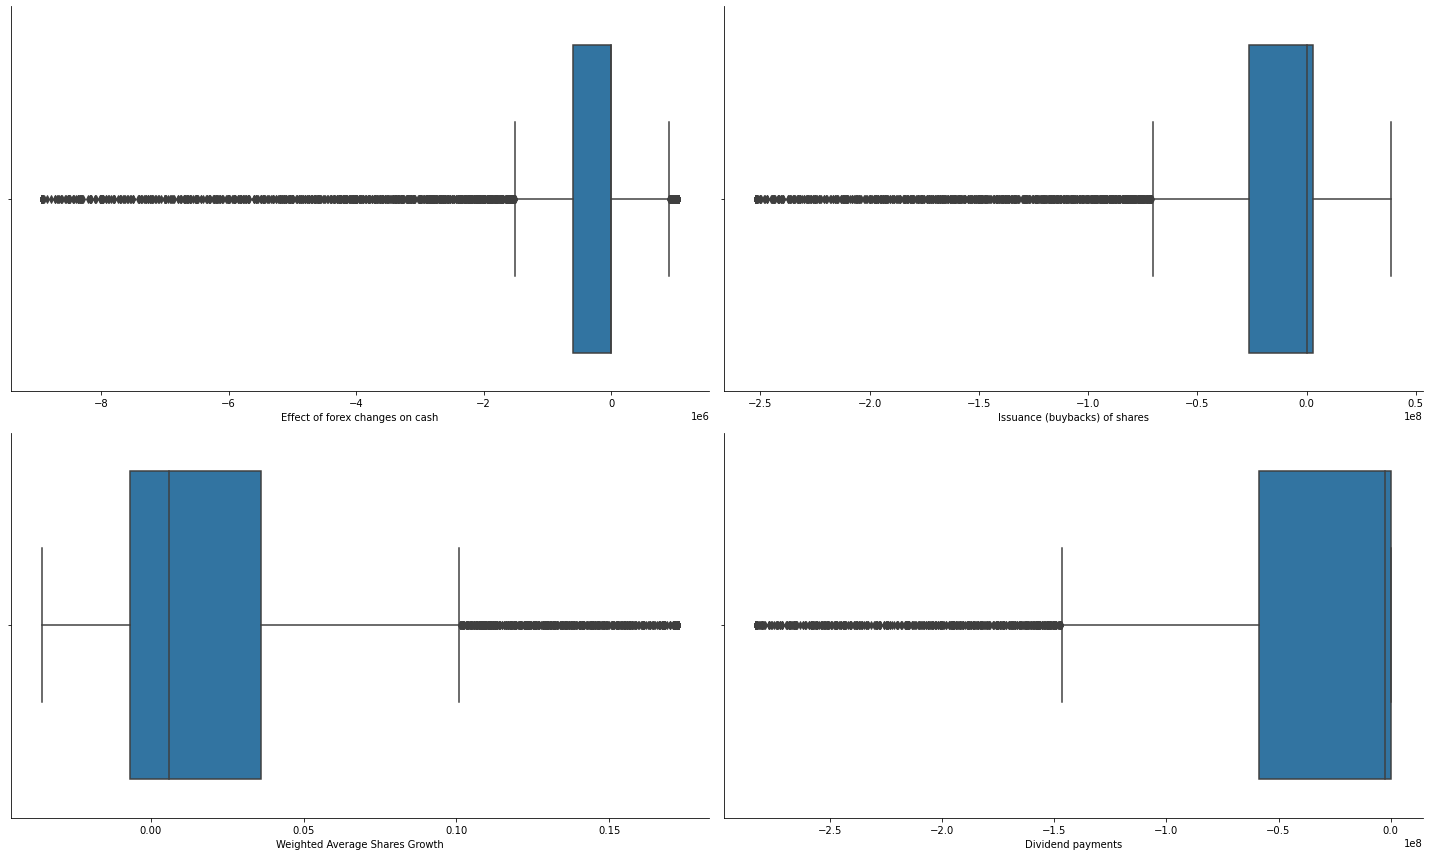

In [549]:
hig_neg_corr = list(df_winow.corr()['Class'].sort_values(ascending=True).index[0:5])

fig = plt.figure(figsize=(20,12))

ax0=fig.add_subplot(2,2,1)
ax1=fig.add_subplot(2,2,2)
ax2=fig.add_subplot(2,2,3)
ax3=fig.add_subplot(2,2,4)

sns.boxplot(df_winow[hig_neg_corr[0]], hue="Class", data=df_winow, ax=ax0)
sns.boxplot(df_winow[hig_neg_corr[1]], hue="Class", data=df_winow, ax=ax1)
sns.boxplot(df_winow[hig_neg_corr[2]], hue="Class", data=df_winow, ax=ax2)
sns.boxplot(df_winow[hig_neg_corr[3]], hue="Class", data=df_winow, ax=ax3)

sns.despine()
plt.tight_layout()
plt.plot()

[]

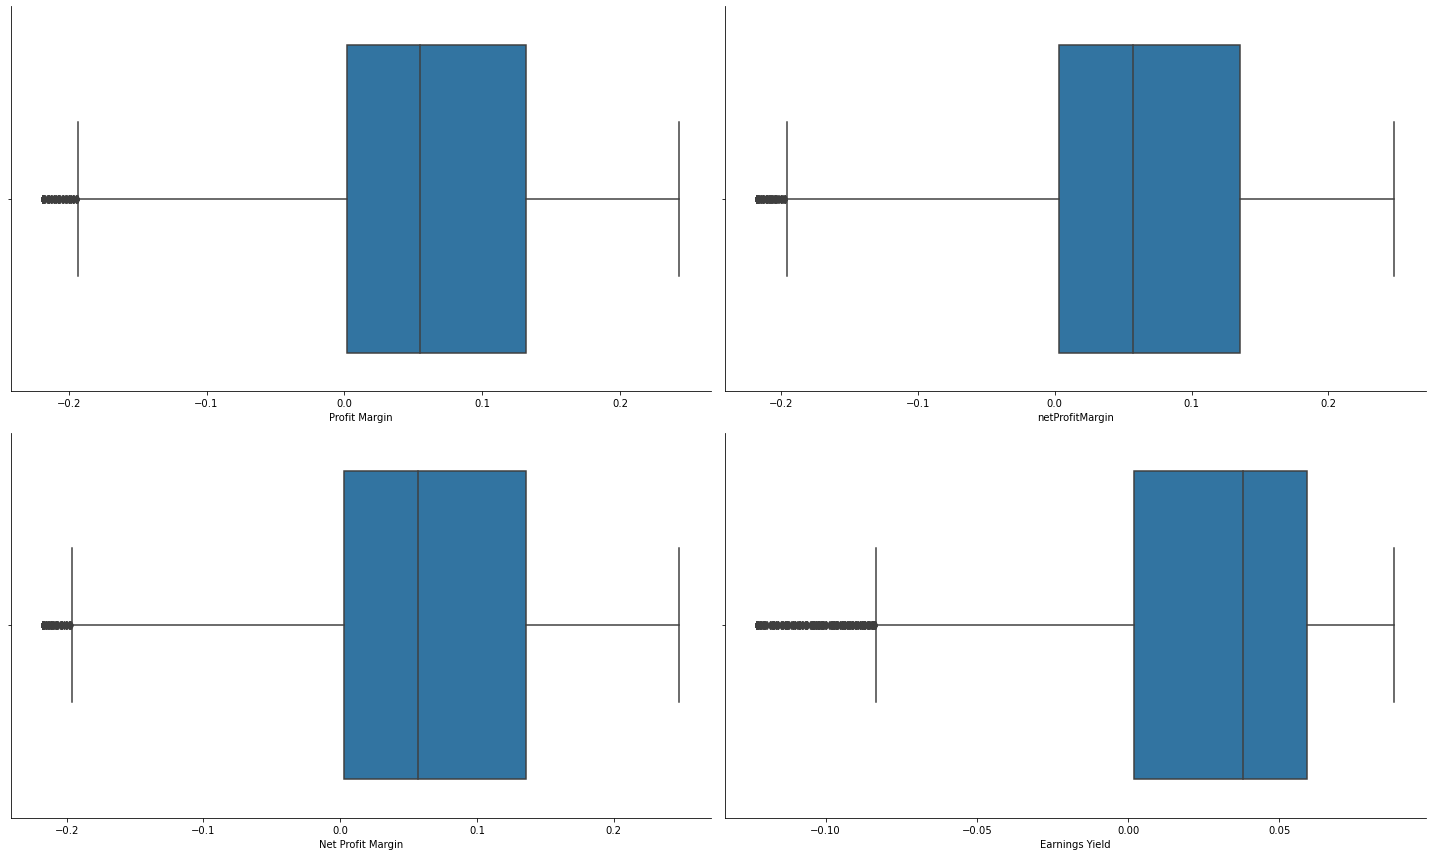

In [550]:
hig_pos_corr = list(df_winow.corr()['Class'].sort_values(ascending=False).index[1:5])

fig = plt.figure(figsize=(20,12))

ax0=fig.add_subplot(2,2,1)
ax1=fig.add_subplot(2,2,2)
ax2=fig.add_subplot(2,2,3)
ax3=fig.add_subplot(2,2,4)

sns.boxplot(df_winow[hig_pos_corr[0]], hue="Class", data=df_winow, ax=ax0)
sns.boxplot(df_winow[hig_pos_corr[1]], hue="Class", data=df_winow, ax=ax1)
sns.boxplot(df_winow[hig_pos_corr[2]], hue="Class", data=df_winow, ax=ax2)
sns.boxplot(df_winow[hig_pos_corr[3]], hue="Class", data=df_winow, ax=ax3)

sns.despine()
plt.tight_layout()
plt.plot()

## 20 percentile - 80 percentile

In [551]:
df_winow2 = pd.DataFrame()
for col in df:
    if(col not in sector_list):
        df_winow2[col] = winsorize(df[col], (0.15, 0.15))
    if(col in sector_list):
        df_winow2[col] = df[col].values

In [552]:
df_winow2.shape

(9186, 171)

[]

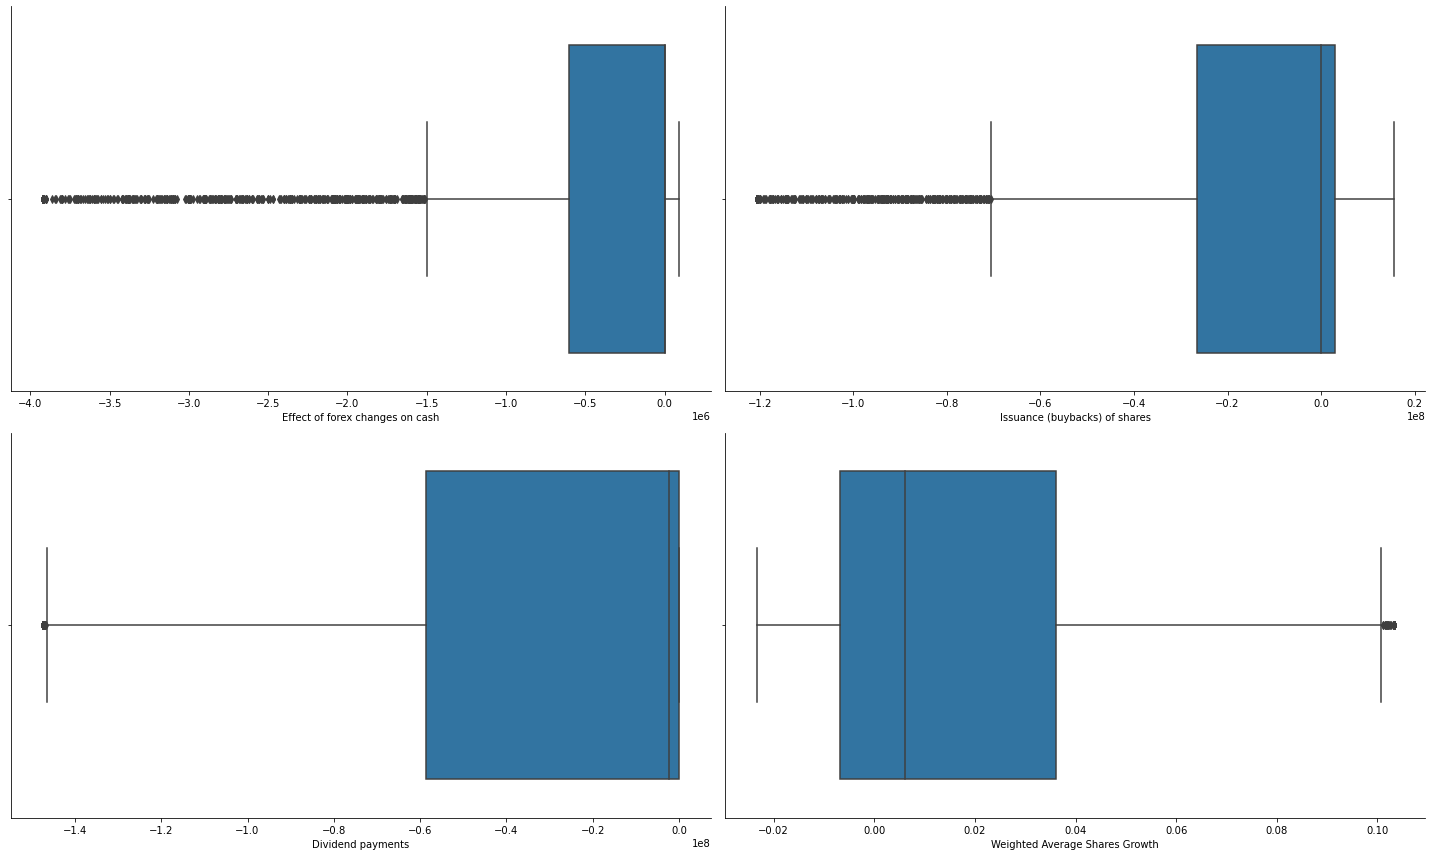

In [553]:
hig_neg_corr = list(df_winow2.corr()['Class'].sort_values(ascending=True).index[0:5])

fig = plt.figure(figsize=(20,12))

ax0=fig.add_subplot(2,2,1)
ax1=fig.add_subplot(2,2,2)
ax2=fig.add_subplot(2,2,3)
ax3=fig.add_subplot(2,2,4)

sns.boxplot(df_winow2[hig_neg_corr[0]], hue="Class", data=df_winow2, ax=ax0)
sns.boxplot(df_winow2[hig_neg_corr[1]], hue="Class", data=df_winow2, ax=ax1)
sns.boxplot(df_winow2[hig_neg_corr[2]], hue="Class", data=df_winow2, ax=ax2)
sns.boxplot(df_winow2[hig_neg_corr[3]], hue="Class", data=df_winow2, ax=ax3)

sns.despine()
plt.tight_layout()
plt.plot()

[]

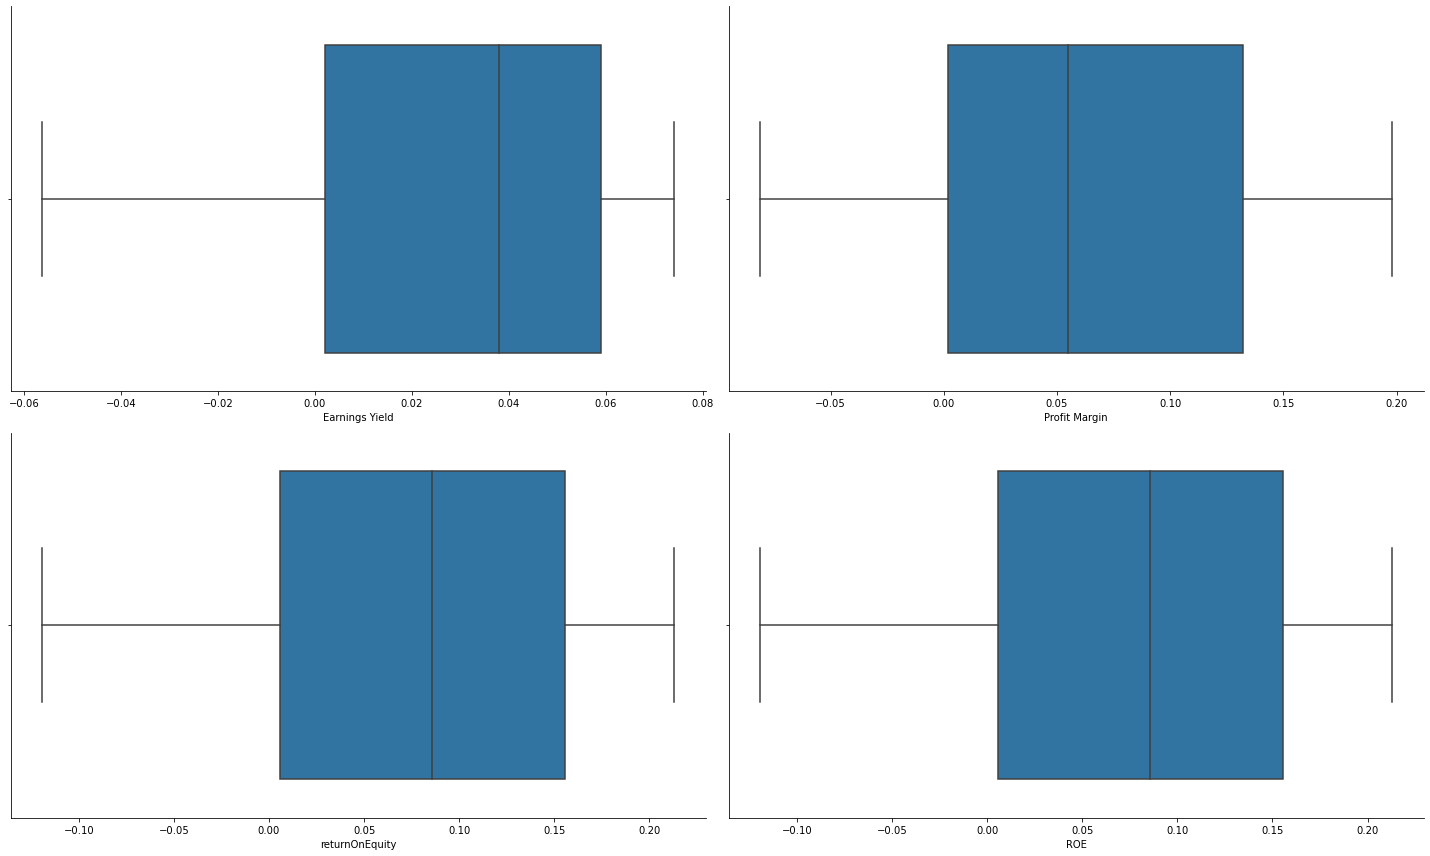

In [554]:
hig_pos_corr = list(df_winow2.corr()['Class'].sort_values(ascending=False).index[1:5])

fig = plt.figure(figsize=(20,12))

ax0=fig.add_subplot(2,2,1)
ax1=fig.add_subplot(2,2,2)
ax2=fig.add_subplot(2,2,3)
ax3=fig.add_subplot(2,2,4)

sns.boxplot(df_winow2[hig_pos_corr[0]], hue="Class", data=df_winow2, ax=ax0)
sns.boxplot(df_winow2[hig_pos_corr[1]], hue="Class", data=df_winow2, ax=ax1)
sns.boxplot(df_winow2[hig_pos_corr[2]], hue="Class", data=df_winow2, ax=ax2)
sns.boxplot(df_winow2[hig_pos_corr[3]], hue="Class", data=df_winow2, ax=ax3)

sns.despine()
plt.tight_layout()
plt.plot()

In [555]:
from sklearn.feature_selection import VarianceThreshold

var_thr = VarianceThreshold(threshold = 0.15) #Removing both constant and quasi-constant
var_thr.fit(df_winow2)

var_thr.get_support()

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True, False, False,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True, False,  True,
        True, False, False, False, False, False, False,  True, False,
        True,  True,

In [556]:
concol = [column for column in df_winow2.columns 
          if column not in df_winow2.columns[var_thr.get_support()]]

for features in concol:
    print(features)


Revenue Growth
Gross Margin
EBITDA Margin
EBIT Margin
Profit Margin
Free Cash Flow margin
Earnings Before Tax Margin
Net Profit Margin
Net Cash/Marketcap
dividendYield
ebitperRevenue
grossProfitMargin
pretaxProfitMargin
netProfitMargin
returnOnEquity
eBITperRevenue
debtRatio
longtermDebtToCapitalization
totalDebtToCapitalization
payoutRatio
operatingCashFlowSalesRatio
Earnings Yield
Free Cash Flow Yield
Debt to Assets
Dividend Yield
Payout Ratio
SG&A to Revenue
Intangibles to Total Assets
Capex to Operating Cash Flow
Capex to Revenue
Stock-based compensation to Revenue
ROE
Gross Profit Growth
Operating Income Growth
Weighted Average Shares Growth
Weighted Average Shares Diluted Growth
Operating Cash Flow growth
3Y Revenue Growth (per Share)
3Y Operating CF Growth (per Share)
3Y Net Income Growth (per Share)
3Y Shareholders Equity Growth (per Share)
Receivables growth
Inventory Growth
Asset Growth
Book Value per Share Growth
Debt Growth
SG&A Expenses Growth
Communication Services
Consum

In [557]:
len(concol)

56

In [558]:
df_winow2.shape

(9186, 171)

In [559]:
df_winow2.drop(concol, axis=1, inplace=True)

# Observation

We get a balanced data with Winsorize 20-80

In [560]:
df = df_winow2

In [924]:
# Mithil---start from here. Our data is df_winow2. No scaler has been applied.

## Train Test Split

In [561]:
my_cv = 10

In [562]:
X = df.drop('Class', axis = 1)
y = df[['Class']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 123)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7348, 114)
(7348, 1)
(1838, 114)
(1838, 1)


In [563]:
y_train_reshape = pd.DataFrame(y_train.values.reshape(-1,1))
print("Counts of label '1': {}".format((y_train_reshape==1).sum()[0]))
print("Counts of label '0': {} \n".format((y_train_reshape==0).sum()[0]))

y_train_1 = (y_train_reshape==1).sum()[0]
print("Percentage of Profitable Company : {}% \n".format(round(y_train_1/len(y_train_reshape)*100,2)))

Counts of label '1': 4301
Counts of label '0': 3047 

Percentage of Profitable Company : 58.53% 



# Scalers

In [564]:
#Importing the PCA module

pca = PCA(random_state=42)
pca_again = PCA(0.95)

## MinMax Scaler

In [565]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 123)

In [566]:
scaler = MinMaxScaler()


X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [567]:
X_train_pca_mm = pca_again.fit_transform(X_train)

In [568]:
X_train_pca_mm.shape

(7348, 42)

In [569]:
# Tranforming X_Test
X_test_pca_mm = pca_again.transform(X_test)
X_test_pca_mm.shape

(1838, 42)

In [570]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(random_state=42)

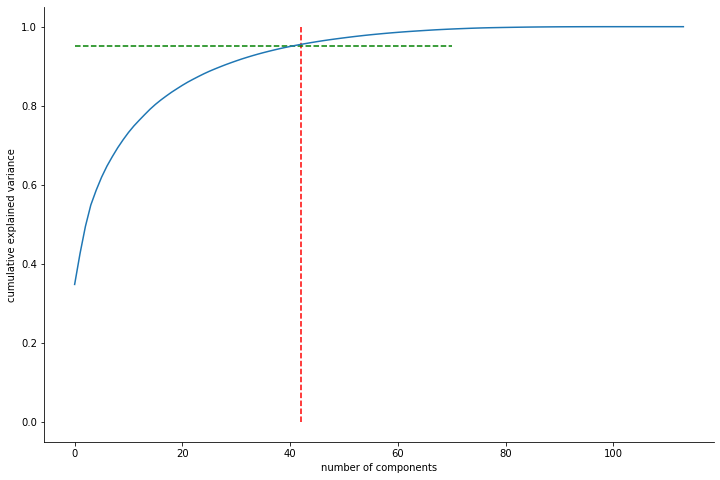

In [571]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.vlines(x = X_train_pca_mm.shape[1],ymax = 1,ymin = 0,colors = 'r',linestyles = '--')
plt.hlines(y = 0.95, xmax = 70,xmin = 0,colors = 'g',linestyles = '--')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

sns.despine()
plt.show()

In [572]:
pca = PCA(n_components=5)

In [573]:
scaler = MinMaxScaler()

In [574]:
scaled_df=df_winow2.copy()
scaled_df=pd.DataFrame(scaler.fit_transform(scaled_df), columns=scaled_df.columns)
pca_fit = pca.fit(scaled_df)

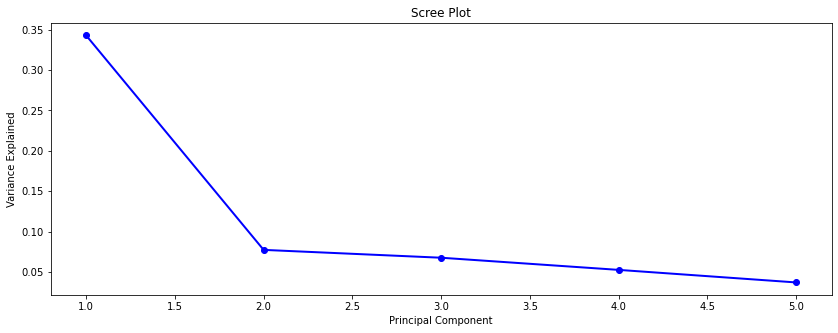

In [575]:
fig = plt.figure(figsize=(14,5))
PC_values = np.arange(pca_fit.n_components_) + 1

plt.plot(PC_values, pca_fit.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')

plt.show()

In [576]:
print(pca_fit.explained_variance_ratio_)

[0.34304832 0.0774031  0.06767525 0.05262593 0.03707487]


## StandardScaler

In [577]:
#Importing the PCA module

pca = PCA(random_state=42)
pca_again = PCA(0.95)

In [578]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 123)

In [579]:
scaler = StandardScaler()


X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [580]:
X_train_pca_std = pca_again.fit_transform(X_train)

In [581]:
X_train_pca_std.shape

(7348, 42)

In [582]:
# Tranforming X_Test
X_test_pca_std = pca_again.transform(X_test)
X_test_pca_std.shape

(1838, 42)

In [583]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(random_state=42)

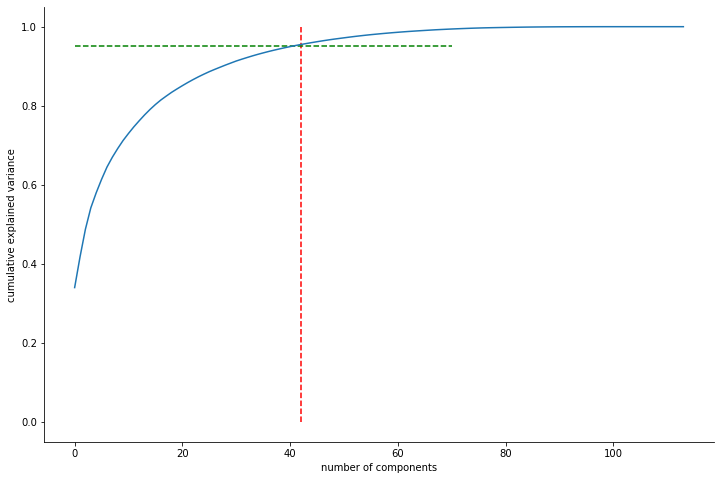

In [584]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.vlines(x = X_train_pca_std.shape[1],ymax = 1,ymin = 0,colors = 'r',linestyles = '--')
plt.hlines(y = 0.95, xmax = 70,xmin = 0,colors = 'g',linestyles = '--')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

sns.despine()
plt.show()

In [585]:
pca = PCA(n_components=5)

In [586]:
scaler = StandardScaler()

In [587]:
scaled_df=df_winow2.copy()
scaled_df=pd.DataFrame(scaler.fit_transform(scaled_df), columns=scaled_df.columns)
pca_fit = pca.fit(scaled_df)

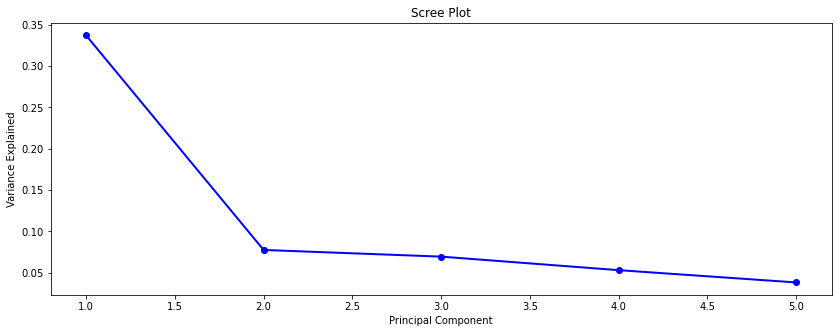

In [588]:
fig = plt.figure(figsize=(14,5))
PC_values = np.arange(pca_fit.n_components_) + 1

plt.plot(PC_values, pca_fit.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')

plt.show()

In [589]:
print(pca_fit.explained_variance_ratio_)

[0.3373026  0.07749795 0.06942321 0.05303822 0.03816655]


# Data Preparation for Modelling

In [590]:
X = df_winow2.drop('Class', axis = 1)
y = df_winow2[['Class']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 100, stratify=y)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7348, 114)
(7348, 1)
(1838, 114)
(1838, 1)


In [591]:
# Normalize the data 

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(X_train)

X_train = pd.DataFrame(data = scaled_data, index = X_train.index, columns = X_train.columns)
X_test = pd.DataFrame(data = scaler.transform(X_test), index = X_test.index, columns = X_test.columns)

In [592]:
print("Before OverSampling, counts of label '1': {}".format((y_train==1).sum()[0]))
print("Before OverSampling, counts of label '0': {} \n".format((y_train==0).sum()[0]))

y_train_1 = (y_train==1).sum()[0]
print("Before OverSampling, churn event rate : {}% \n".format(round(y_train_1/len(y_train)*100,2)))

Before OverSampling, counts of label '1': 4316
Before OverSampling, counts of label '0': 3032 

Before OverSampling, churn event rate : 58.74% 



In [593]:
# sm_smot = smot(random_state=27, sampling_strategy=1)
# X_train_res, y_train_res = sm_smot.fit_resample(X_train, y_train)
X_train_res = X_train
y_train_res = y_train

# Defining functions for Modelling

In [594]:
# Defining the function to plot the ROC Curve

def draw_roc (actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
    
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(7,5))
    plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)"%auc_score)
    
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate or [1 - True Negative Rate]")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating charactersitc example")
    plt.legend(loc="lower right")
    sns.despine()
    plt.tight_layout()
    plt.show()
    
    return fpr, tpr, thresholds

In [595]:
metricsdataframe=pd.DataFrame(columns=['Model',
                                       'Train/Test',
                                       'Roc_auc_score',
                                       'Sensitivity',
                                       'Specificity',
                                      'FPR',
                                      'Positive predictive value',
                                      'Negative Predictive value',
                                      'Precision',
                                      'Accuracy',
                                      'F1-Score'])

In [596]:
# Defining function to get the evaluation metrics of the models.
def getModelMetrics(actual_Class=False,pred_Class=False,model_name='',train_or_test=''):

    confusion = metrics.confusion_matrix(actual_Class, pred_Class)

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    

    
    Roc_auc_score=round(metrics.roc_auc_score(actual_Class,pred_Class),2)
    # Let's see the sensitivity of our logistic regression model
    Sensitivity=round((TP / float(TP+FN)),2)
    # Let us calculate specificity
    Specificity=round((TN / float(TN+FP)),2)
    # Calculate false postive rate - predicting profit when customer does not have profitted
    FPR=round((FP/ float(TN+FP)),2)
    # positive predictive value 
    PositivePredictiveValue=round((TP / float(TP+FP)),2)
    # Negative predictive value
    NegativePredictiveValue=round((TN / float(TN+ FN)),2)
    # sklearn precision score value 
    Precision=round(metrics.precision_score(actual_Class, pred_Class ),2)
    # Accuracy
    Accuracy = round(metrics.accuracy_score(actual_Class, pred_Class), 2)
    # F-1 Score
    F1_Score = round(metrics.f1_score(actual_Class, pred_Class), 2)
    
    
    print("Roc_auc_score : {}".format(metrics.roc_auc_score(actual_Class,pred_Class)))
    # Let's see the sensitivity of our logistic regression model
    print('Sensitivity/Recall : {}'.format(TP / float(TP+FN)))
    # Let us calculate specificity
    print('Specificity: {}'.format(TN / float(TN+FP)))
    # Calculate false postive rate - predicting profit when customer does not have profitted
    print('False Positive Rate: {}'.format(FP/ float(TN+FP)))
    # positive predictive value 
    print('Positive predictive value: {}'.format(TP / float(TP+FP)))
    # Negative predictive value
    print('Negative Predictive value: {}'.format(TN / float(TN+ FN)))
    # sklearn precision score value 
    print('Precision: {}'.format(metrics.precision_score(actual_Class, pred_Class )))
    # sklearn precision score value 
    print('Accuracy: {}'.format(metrics.accuracy_score(actual_Class, pred_Class )))
    #F1 Score
    print("F1 Score: {}".format(metrics.f1_score(actual_Class, pred_Class )))
    
#     data_list=[model_name,train_or_test,Roc_auc_score,Sensitivity,Specificity,NegativePredictiveValue,Precision, ]
    data_list=[model_name,train_or_test,Roc_auc_score,Sensitivity,Specificity,FPR,PositivePredictiveValue,NegativePredictiveValue,Precision, Accuracy, F1_Score]
    series_metrics=pd.Series(data_list,index=metricsdataframe.columns)
    
    return series_metrics
    

In [597]:
# Defining function to write the evaluation metrics of the models into data frame.
def WriteModelMetrics(series_metrics,metricsdataframe):
    metricsdataframe = metricsdataframe.append(series_metrics,ignore_index=True)
    return metricsdataframe

In [598]:
# Function to find the optimal cutoff for classifing as Profit/non-profit
def findOptimalCutoff(df):
    
    # Let's create columns with different probability cutoffs 
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        df[i] = df.Class_Prob.map( lambda x: 1 if x > i else 0)
        
    
    # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
    from sklearn.metrics import confusion_matrix
    
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

    for i in num:
        cm1 = metrics.confusion_matrix(df.Class, df[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    print(cutoff_df)
    
    # Let's plot accuracy sensitivity and specificity for various probabilities.
    cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
    plt.figure(figsize=(7,5))
    plt.tight_layout()
    sns.despine()
    plt.show()

In [599]:
# Calculating VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Defining a function to give VIF value 
def vif_cal(X):     
    vif = pd.DataFrame() 
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]    
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by="VIF", ascending=False)
    return vif


In [600]:
# This method will result in the calculation of predicted value of the Class column.
def predictClassWithProb(model,X,y,prob,model_name='',train_or_test=''):
    
    # predict
    pred_probs = model.predict_proba(X)[:,1]
    
    y_df= pd.DataFrame({'Class':y.Class, 'Class_Prob':pred_probs})
    # Creating new column 'predicted' with 1 if Class_Prob>0.5 else 0
    y_df['final_predicted'] = y_df.Class_Prob.map( lambda x: 1 if x > prob else 0)
    # Let's see the head
    series_metrics=getModelMetrics(y_df.Class,y_df.final_predicted,model_name,train_or_test)
    return y_df,series_metrics

In [601]:
# This method will perform cross-validation and the display the model report.
def modelfit(alg, X_train, y_train, performCV=True, cv_folds=my_cv):
    #Fit the algorithm on the data
    alg.fit(X_train, y_train)
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_train)
    dtrain_predprob = alg.predict_proba(X_train)[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, X_train, y_train, cv=cv_folds, scoring='accuracy')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.3g" % metrics.roc_auc_score(y_train, dtrain_predictions))
    print ("Recall/Sensitivity : %.3g" % metrics.recall_score(y_train, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.3g | Std - %.3g | Min - %.3g | Max - %.3g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        

In [602]:
# # This method will plot accuracy of the model with the max_depth of decision tree.
# def plot_traintestAcc(score,param):
#     scores = score
#     # plotting accuracies with max_depth
#     plt.figure()
#     plt.plot(scores["param_"+param], 
#     scores["mean_train_score"], 
#     label="training accuracy")
#     plt.plot(scores["param_"+param], 
#     scores["mean_test_score"], 
#     label="test accuracy")
#     plt.xlabel(param)
#     plt.ylabel("accuracy")
#     plt.legend()
#     plt.show()

In [603]:
# This method will plot accuracy of the random forest model.
def random_forst_feature_graph(grid_search, param):
    scores = grid_search.cv_results_
    plt.figure(figsize=(8,8))
    
    param = "param_"+param
    plt.plot(scores[param], 
             scores["mean_train_score"], 
             label="Training accuracy")

    plt.plot(scores[param], 
             scores["mean_test_score"], 
             label="Test accuracy")

    plt.xlabel(param)
    plt.ylabel("F1")
    plt.legend()

    plt.tight_layout()
    sns.despine()
    plt.show()

# Modelling

In [604]:
X_train = X_train_pca_mm
X_test = X_test_pca_mm


In [605]:
X_train_pca = X_train
y_train_res = y_train
X_test_pca = X_test
# y_test = y_test

y_train_res=y_train_res.values.reshape(-1,1)
# y_test = y_test.values.reshape(-1,1)

In [606]:
X_train_pca.shape

(7348, 42)

In [607]:
y_train_res.shape

(7348, 1)

In [608]:
X_test_pca.shape

(1838, 42)

In [609]:
y_test.shape

(1838, 1)

In [610]:
y_train_res = pd.DataFrame(y_train_res)

In [611]:
y_train_res.rename(columns={0:"Class"}, inplace=True)

In [612]:
y_train_res

,Class
0,0
1,0
2,1
3,0
4,1
...,...
7343,0
7344,1
7345,0
7346,1


In [613]:
y_test 

,Class
6802,1
1363,1
1111,1
5514,1
5953,0
...,...
2707,0
6359,1
2556,1
1752,1


# 1. Logistic Regression

In [614]:
# Creating Train-Test variables for Logistic Regression
X_train_lr = pd.DataFrame(X_train_pca)
y_train_lr = pd.DataFrame(y_train_res)
X_test_lr = pd.DataFrame(X_test_pca)
y_test_lr = y_test

In [615]:
logml = sm.GLM(y_train_lr, (sm.add_constant(X_train_lr)), family = sm.families.Binomial())
logml.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:                 7348
Model:                            GLM   Df Residuals:                     7305
Model Family:                Binomial   Df Model:                           42
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4963.4
Date:                Sat, 16 Oct 2021   Deviance:                       9926.7
Time:                        22:28:43   Pearson chi2:                 7.35e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3547      0.024     14.931      0.000       0.308       0.401
0              0.0008      0.011      0.074      0.941      -0.020       0.021
1              0.0164      0.022      0.734      0.463      -0.027       0.060
2             -0.0067      0.024     -0.282      0.778      -0.053       0.040
3              0.0333      0.027      1.246      0.213      -0.019       0.086
4             -0.0048      0.032     -0.151      0.880      -0.068       0.058
5              0.0663      0.034      1.934      0.053      -0.001       0.133
6             -0.0134      0.037     -0.360      0.719      -0.086       0.059
7              0.0155      0.040      0.387      0.698      -0.063       0.094
8              0.0364      0.041      0.876      0.381      -0.045       0.118
9             -0.0759      0.044     -1.734      0.083      -0.162       0.010
10            -0.0335      0.046     -0.735      0.463      -0.123       0.056
11             0.0039      0.048      0.080      0.937      -0.091       0.099
12             0.0262      0.051      0.509      0.611      -0.075       0.127
13            -0.0346      0.052     -0.660      0.509      -0.137       0.068
14            -0.0855      0.053     -1.610      0.107      -0.190       0.019
15             0.0374      0.056      0.666      0.506      -0.073       0.148
16             0.0719      0.059      1.213      0.225      -0.044       0.188
17            -0.1103      0.062     -1.784      0.074      -0.231       0.011
18             0.0262      0.063      0.415      0.678      -0.098       0.150
19            -0.1180      0.066     -1.781      0.075      -0.248       0.012
20            -0.0246      0.067     -0.368      0.713      -0.155       0.106
21            -0.0475      0.069     -0.684      0.494      -0.183       0.089
22            -0.0424      0.073     -0.582      0.561      -0.185       0.100
23            -0.0256      0.074     -0.345      0.730      -0.171       0.120
24             0.0949      0.076      1.256      0.209      -0.053       0.243
25             0.0373      0.079      0.474      0.635      -0.117       0.192
26             0.0401      0.082      0.488      0.625      -0.121       0.201
27            -0.0021      0.084     -0.025      0.980      -0.167       0.162
28            -0.0918      0.085     -1.076      0.282      -0.259       0.075
29             0.1515      0.088      1.717      0.086      -0.021       0.325
30            -0.0547      0.090     -0.611      0.541      -0.230       0.121
31            -0.0655      0.091     -0.716      0.474      -0.245       0.114
32             0.0834      0.095      0.879      0.379      -0.103       0.269
33             0.0965      0.097      0.995      0.320      -0.094       0.287
34            -0.0786      0.100     -0.789      0.430      -0.274       0.117
35

In [616]:
# Checking for the VIF of the train data.
vif = vif_cal(X_train_lr) 
vif

,Features,VIF
0,0,1.0
31,31,1.0
23,23,1.0
24,24,1.0
25,25,1.0
26,26,1.0
27,27,1.0
28,28,1.0
29,29,1.0
30,30,1.0


### Observation
- There are no Columns which are highly correlated ---> VIF = 1
- There are not many columns whose coefficients are not statistically significant ----> p>0.05

In [617]:
lg = LogisticRegression()

In [618]:
modelfit(lg, X_train_lr, y_train_lr)


Model Report
Accuracy : 0.503
Recall/Sensitivity : 0.993
AUC Score (Train): 0.537371
CV Score : Mean - 0.583 | Std - 0.00679 | Min - 0.573 | Max - 0.589


In [619]:
# predictions on Test data
pred_probs_test = lg.predict(X_test_lr)
getModelMetrics(y_test_lr,pred_probs_test)

Roc_auc_score : 0.499586671404377
Sensitivity/Recall : 0.9925857275254866
Specificity: 0.006587615283267457
False Positive Rate: 0.9934123847167325
Positive predictive value: 0.5868493150684931
Negative Predictive value: 0.38461538461538464
Precision: 0.5868493150684931
Accuracy: 0.5854189336235038
F1 Score: 0.737603305785124


Model                            
Train/Test                       
Roc_auc_score                 0.5
Sensitivity                  0.99
Specificity                  0.01
FPR                          0.99
Positive predictive value    0.59
Negative Predictive value    0.38
Precision                    0.59
Accuracy                     0.59
F1-Score                     0.74
dtype: object

In [620]:
print("Accuracy : {}".format(metrics.accuracy_score(y_test_lr,pred_probs_test)))
print("Recall : {}".format(metrics.recall_score(y_test_lr,pred_probs_test)))
print("Precision : {}".format(metrics.precision_score(y_test_lr,pred_probs_test)))

Accuracy : 0.5854189336235038
Recall : 0.9925857275254866
Precision : 0.5868493150684931


In [627]:
print(metrics.confusion_matrix(y_test_lr,pred_probs_test))

[[   5  754]
 [   8 1071]]


In [621]:
#Making prediction on the test data
pred_probs_train = lg.predict_proba(X_train_lr)[:,1]

print("roc_auc_score(Train) {:2.2}".format(metrics.roc_auc_score(y_train_lr, pred_probs_train)))

roc_auc_score(Train) 0.54


In [622]:
y_train_lr.rename(columns={0:"Class"}, inplace=True)

cut_off_prob=0.5
y_train_df,series_metrics = predictClassWithProb(lg,X_train_lr,y_train_lr,cut_off_prob)


Roc_auc_score : 0.5032367138535876
Sensitivity/Recall : 0.9932808155699722
Specificity: 0.013192612137203167
False Positive Rate: 0.9868073878627969
Positive predictive value: 0.5889545267207034
Negative Predictive value: 0.5797101449275363
Precision: 0.5889545267207034
Accuracy: 0.5888677191072401
F1 Score: 0.7394566623544631


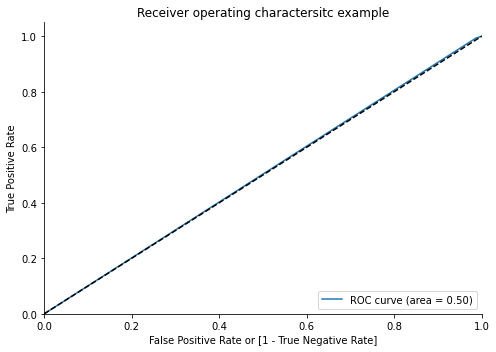

roc_auc_score : 0.50


In [623]:
draw_roc(y_train_df.Class, y_train_df.final_predicted)
print("roc_auc_score : {:2.2f}".format(metrics.roc_auc_score(y_train_df.Class, y_train_df.final_predicted)))

In [624]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
print("roc_auc_score : {:2.2f}".format(metrics.roc_auc_score(y_train_df.Class, y_train_df.final_predicted)))

roc_auc_score : 0.50


     prob  accuracy     sensi     speci
0.0   0.0  0.587371  1.000000  0.000000
0.1   0.1  0.587371  1.000000  0.000000
0.2   0.2  0.587371  1.000000  0.000000
0.3   0.3  0.587371  1.000000  0.000000
0.4   0.4  0.587371  1.000000  0.000000
0.5   0.5  0.588868  0.993281  0.013193
0.6   0.6  0.501361  0.385774  0.665897
0.7   0.7  0.412765  0.000232  1.000000
0.8   0.8  0.412629  0.000000  1.000000
0.9   0.9  0.412629  0.000000  1.000000


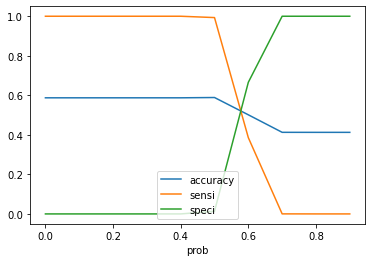

<Figure size 504x360 with 0 Axes>

In [625]:
# finding cut-off with the right balance of the metrices
# sensitivity vs specificity trade-off
findOptimalCutoff(y_train_df)

In [626]:
# predicting with the choosen cut-off on TRAIN
cut_off_prob = 0.5
y_train_df,series_metrics = predictClassWithProb(lg,X_train_lr,y_train_lr,cut_off_prob,model_name='Logistic Regression',train_or_test='TRAIN')
metricsdataframe=WriteModelMetrics(series_metrics,metricsdataframe)

Roc_auc_score : 0.5032367138535876
Sensitivity/Recall : 0.9932808155699722
Specificity: 0.013192612137203167
False Positive Rate: 0.9868073878627969
Positive predictive value: 0.5889545267207034
Negative Predictive value: 0.5797101449275363
Precision: 0.5889545267207034
Accuracy: 0.5888677191072401
F1 Score: 0.7394566623544631


In [417]:
### predicting with the choosen cut-off on TEST
cut_off_prob=0.5
y_train_df,series_metrics = predictClassWithProb(lg,X_test_lr,y_test_lr,cut_off_prob,model_name='Logistic Regression',train_or_test='TEST')
metricsdataframe=WriteModelMetrics(series_metrics,metricsdataframe)

Roc_auc_score : 0.499586671404377
Sensitivity/Recall : 0.9925857275254866
Specificity: 0.006587615283267457
False Positive Rate: 0.9934123847167325
Positive predictive value: 0.5868493150684931
Negative Predictive value: 0.38461538461538464
Precision: 0.5868493150684931
Accuracy: 0.5854189336235038
F1 Score: 0.737603305785124


#### 

## 2. Decision Tree

In [628]:
# Creating Train-Test variables for Decision Tree
X_train_dt = pd.DataFrame(X_train_pca)
y_train_dt = pd.DataFrame(y_train_res)
X_test_dt = pd.DataFrame(X_test_pca)
y_test_dt = y_test

In [629]:
X_train_dt.shape

(7348, 42)

In [630]:
y_train_dt.shape

(7348, 1)

In [631]:
X_test_dt.shape, y_test_dt.shape

((1838, 42), (1838, 1))

In [632]:
##### Applying Decision Tree Classifier on our principal components with Hyperparameter tuning
dt = DecisionTreeClassifier(class_weight='balanced',
                             max_features='auto',
                             min_samples_split=100,
                             min_samples_leaf=100,
                             max_depth=10,
                             random_state=123)

modelfit(dt, X_train_dt, y_train_dt)


Model Report
Accuracy : 0.575
Recall/Sensitivity : 0.569
AUC Score (Train): 0.602402
CV Score : Mean - 0.513 | Std - 0.0124 | Min - 0.495 | Max - 0.522


In [633]:
# make predictions
pred_probs_test = dt.predict(X_test_dt)

#Let's check the model metrices.

getModelMetrics(y_test_dt,pred_probs_test)

Roc_auc_score : 0.5181425000702109
Sensitivity/Recall : 0.5514365152919369
Specificity: 0.48484848484848486
False Positive Rate: 0.5151515151515151
Positive predictive value: 0.603448275862069
Negative Predictive value: 0.431924882629108
Precision: 0.603448275862069
Accuracy: 0.5239390642002176
F1 Score: 0.576271186440678


Model                            
Train/Test                       
Roc_auc_score                0.52
Sensitivity                  0.55
Specificity                  0.48
FPR                          0.52
Positive predictive value     0.6
Negative Predictive value    0.43
Precision                     0.6
Accuracy                     0.52
F1-Score                     0.58
dtype: object

In [634]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [5,10,15,20,30,50],
    'min_samples_leaf': range(100, 500, 50),
    'min_samples_split': range(100, 500, 50),
    'max_features': [5,10,15,20,30,50]
}
# Create a base model
dt = DecisionTreeClassifier(class_weight='balanced',random_state=123)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, cv = my_cv, n_jobs = -1,verbose = 1000,scoring="f1_weighted")

In [635]:
# Fit the grid search to the data
grid_search.fit(X_train_dt, y_train_dt)

Fitting 3 folds for each of 2304 candidates, totalling 6912 fits


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=123),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20, 30, 50],
                         'max_features': [5, 10, 15, 20, 30, 50],
                         'min_samples_leaf': range(100, 500, 50),
                         'min_samples_split': range(100, 500, 50)},
             scoring='f1_weighted', verbose=1000)

In [636]:
# printing the optimal accuracy score and hyperparameters
print('We can get score of',grid_search.best_score_,'using',grid_search.best_params_)

We can get score of 0.5213289361322495 using {'max_depth': 15, 'max_features': 30, 'min_samples_leaf': 100, 'min_samples_split': 250}


In [637]:
cv_df = pd.DataFrame(grid_search.cv_results_)
cv_df.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.039645,0.007344,0.010239,0.010438,5,5,100,100,"{'max_depth': 5, 'max_features': 5, 'min_sampl...",0.453859,0.344547,0.36034,0.386249,0.048241,1918
1,0.028452,0.002130,0.003440,0.001355,5,5,100,150,"{'max_depth': 5, 'max_features': 5, 'min_sampl...",0.453859,0.344547,0.36034,0.386249,0.048241,1918
2,0.034692,0.014488,0.005438,0.002147,5,5,100,200,"{'max_depth': 5, 'max_features': 5, 'min_sampl...",0.453859,0.344547,0.36034,0.386249,0.048241,1918


In [638]:
cv_df.nlargest(3,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
1027,0.128913,0.008298,0.003467,0.001823,15,30,100,250,"{'max_depth': 15, 'max_features': 30, 'min_sam...",0.523596,0.528461,0.511929,0.521329,0.006937,1
1411,0.153120,0.006942,0.003086,0.001207,20,30,100,250,"{'max_depth': 20, 'max_features': 30, 'min_sam...",0.523596,0.528461,0.511929,0.521329,0.006937,1
1795,0.143509,0.027072,0.004282,0.001669,30,30,100,250,"{'max_depth': 30, 'max_features': 30, 'min_sam...",0.523596,0.528461,0.511929,0.521329,0.006937,1


In [639]:
grid_search.best_score_

0.5213289361322495

In [640]:
grid_search.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=15, max_features=30,
                       min_samples_leaf=100, min_samples_split=250,
                       random_state=123)

In [641]:
param_max_depth = cv_df.nlargest(3,"mean_test_score").param_max_depth.iloc[0]
param_max_features = cv_df.nlargest(3,"mean_test_score").param_max_features.iloc[0]
param_min_samples_leaf = cv_df.nlargest(3,"mean_test_score").param_min_samples_leaf.iloc[0]
param_min_samples_split = cv_df.nlargest(3,"mean_test_score").param_min_samples_split.iloc[0]

In [642]:
# model with the best hyperparameters
dt_final = DecisionTreeClassifier(class_weight='balanced',
                             max_depth=param_max_depth,
                             max_features=param_max_features,
                             min_samples_leaf=param_min_samples_leaf, 
                             min_samples_split=param_min_samples_split,
                             random_state=123)

In [643]:
modelfit(dt_final,X_train_dt,y_train_dt)


Model Report
Accuracy : 0.611
Recall/Sensitivity : 0.612
AUC Score (Train): 0.649906
CV Score : Mean - 0.519 | Std - 0.00747 | Min - 0.509 | Max - 0.527


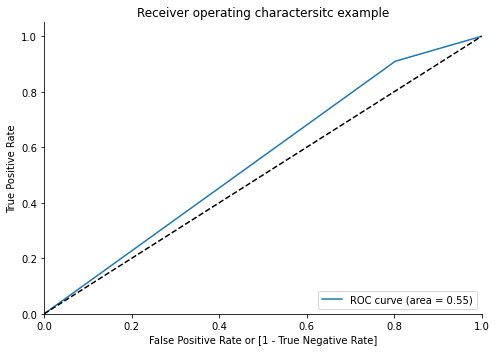

roc_auc_score : 0.55


In [663]:
draw_roc(y_train_df.Class, y_train_df.final_predicted)
print("roc_auc_score : {:2.2f}".format(metrics.roc_auc_score(y_train_df.Class, y_train_df.final_predicted)))

In [644]:
# make predictions
pred_probs_test = dt_final.predict(X_test_dt)
#Let's check the model metrices.
getModelMetrics(actual_Class=y_test_dt,pred_Class=pred_probs_test)

Roc_auc_score : 0.5157803607253582
Sensitivity/Recall : 0.5282669138090825
Specificity: 0.5032938076416338
False Positive Rate: 0.49670619235836627
Positive predictive value: 0.6019007391763463
Negative Predictive value: 0.4287317620650954
Precision: 0.6019007391763463
Accuracy: 0.5179542981501633
F1 Score: 0.5626850937808489


Model                            
Train/Test                       
Roc_auc_score                0.52
Sensitivity                  0.53
Specificity                   0.5
FPR                           0.5
Positive predictive value     0.6
Negative Predictive value    0.43
Precision                     0.6
Accuracy                     0.52
F1-Score                     0.56
dtype: object

In [645]:
# predicting churn with default cut-off 0.5
cut_off_prob = 0.5
y_train_df,series_metrics = predictClassWithProb(dt_final,X_train_dt,y_train_dt,cut_off_prob)

Roc_auc_score : 0.6111005316170303
Sensitivity/Recall : 0.6123725671918443
Specificity: 0.6098284960422163
False Positive Rate: 0.39017150395778366
Positive predictive value: 0.6907997909043387
Negative Predictive value: 0.5249858035207269
Precision: 0.6907997909043387
Accuracy: 0.6113228089275994
F1 Score: 0.649226234340457


     prob  accuracy     sensi     speci
0.0   0.0  0.587371  1.000000  0.000000
0.1   0.1  0.587371  1.000000  0.000000
0.2   0.2  0.587371  1.000000  0.000000
0.3   0.3  0.597305  0.983550  0.047493
0.4   0.4  0.625340  0.776413  0.410290
0.5   0.5  0.611323  0.612373  0.609828
0.6   0.6  0.541508  0.329240  0.843668
0.7   0.7  0.454273  0.094764  0.966029
0.8   0.8  0.412629  0.000000  1.000000
0.9   0.9  0.412629  0.000000  1.000000


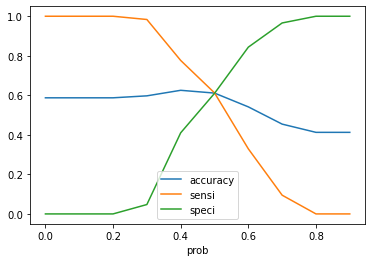

<Figure size 504x360 with 0 Axes>

In [646]:
# finding cut-off with the right balance of the metrices
findOptimalCutoff(y_train_df)

In [661]:
# predicting churn with cut-off 0.4
cut_off_prob=0.36
y_train_df,series_metrics = predictClassWithProb(dt_final,X_train_dt,y_train_dt,cut_off_prob,model_name='Decision Tree',train_or_test='TRAIN')
metricsdataframe=WriteModelMetrics(series_metrics,metricsdataframe)

Roc_auc_score : 0.553665748848856
Sensitivity/Recall : 0.9101019462465245
Specificity: 0.19722955145118734
False Positive Rate: 0.8027704485488126
Positive predictive value: 0.6174159069475008
Negative Predictive value: 0.6064908722109533
Precision: 0.6174159069475008
Accuracy: 0.6159499183451279
F1 Score: 0.7357182993069863


In [662]:
#Lets see how it performs on test data.
y_test_df,series_metrics= predictClassWithProb(dt_final,X_test_dt,y_test_dt,cut_off_prob,model_name='Decision Tree',train_or_test='TEST')
metricsdataframe=WriteModelMetrics(series_metrics,metricsdataframe)

Roc_auc_score : 0.5006831827156605
Sensitivity/Recall : 0.8748841519925857
Specificity: 0.12648221343873517
False Positive Rate: 0.8735177865612648
Positive predictive value: 0.5874299937772246
Negative Predictive value: 0.4155844155844156
Precision: 0.5874299937772246
Accuracy: 0.5658324265505985
F1 Score: 0.7029039463886819


# 3. Random Forest

In [649]:
# Creating Train-Test variables for Random Forest
X_train_rf = pd.DataFrame(X_train_pca)
y_train_rf = pd.DataFrame(y_train_res)
X_test_rf = pd.DataFrame(X_test_pca)
y_test_rf = y_test

In [650]:
rf = RandomForestClassifier(random_state=42, max_depth=5, n_estimators=20, oob_score=True)

In [ ]:
rf.fit(X_train_rf, y_train_rf)

In [ ]:
rf.oob_score_

In [ ]:
# make predictions
pred_probs_test = rf.predict(X_test_rf)

#Let's check the model metrices.
getModelMetrics(actual_Class=y_test_rf,pred_Class=pred_probs_test)

In [ ]:
parameters = {'max_depth': range(5, 40, 5)}
rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, parameters, cv=my_cv, scoring="f1_weighted", verbose=1000, return_train_score=True)

grid_search.fit(X_train_rf, y_train_rf)

In [ ]:
pd.DataFrame(grid_search.cv_results_).sort_values(by="rank_test_score")

In [ ]:
# grid_search.cv_results_

plot_traintestAcc(grid_search.cv_results_,'max_depth')

In [ ]:
my_max_depth = pd.DataFrame(grid_search.cv_results_).sort_values(by="rank_test_score")['param_max_depth'].iloc[0]

### Tuning n_estimators

In [ ]:
parameters = {'n_estimators': range(5, 70, 5)}

rf = RandomForestClassifier(max_depth=my_max_depth,random_state=10)
grid_search = GridSearchCV(rf, parameters, cv=my_cv, scoring="f1_weighted", verbose=100, return_train_score=True)


grid_search.fit(X_train_rf, y_train_rf)

In [ ]:
pd.DataFrame(grid_search.cv_results_).sort_values(by="rank_test_score").head()

In [ ]:
random_forst_feature_graph(grid_search, "n_estimators")

In [ ]:
my_n_estimator = pd.DataFrame(grid_search.cv_results_).sort_values(by="rank_test_score")['param_n_estimators'].iloc[0]

### Tuning max_features

In [ ]:
parameters = {'max_features': [5, 10, 15, 20, 25, 30,50,70]}

rf = RandomForestClassifier(max_depth=my_max_depth,n_estimators = my_n_estimator,random_state=10)
grid_search = GridSearchCV(rf, parameters, cv=my_cv, scoring="f1_weighted", verbose=1000, return_train_score=True)


grid_search.fit(X_train_rf, y_train_rf)

In [ ]:
pd.DataFrame(grid_search.cv_results_).sort_values(by="rank_test_score")

In [ ]:
random_forst_feature_graph(grid_search, "max_features")

In [ ]:
my_max_features=pd.DataFrame(grid_search.cv_results_).sort_values(by="rank_test_score")['param_max_features'].iloc[0]

### Tuning min_samples_leaf

In [ ]:
parameters = {'min_samples_leaf': range(1, 500, 50)}

rf = RandomForestClassifier(max_depth=my_max_depth,n_estimators = my_n_estimator, max_features = my_max_features, random_state=10)
grid_search = GridSearchCV(rf, parameters, cv=my_cv, scoring="f1_weighted", verbose=1000, return_train_score=True)

grid_search.fit(X_train_rf, y_train_rf)

In [ ]:
pd.DataFrame(grid_search.cv_results_).sort_values(by="rank_test_score")

In [ ]:
random_forst_feature_graph(grid_search, "min_samples_leaf")

In [ ]:
my_min_sample_leaf = pd.DataFrame(grid_search.cv_results_).sort_values(by="rank_test_score")['param_min_samples_leaf'].iloc[0]

### Tuning min_samples_split

In [ ]:
parameters = {'min_samples_split': range(50, 550, 50)}

rf = RandomForestClassifier(max_depth=my_max_depth,n_estimators = my_n_estimator, max_features = my_max_features, min_samples_leaf = my_min_sample_leaf,random_state=10)
grid_search = GridSearchCV(rf, parameters, cv=my_cv, scoring="f1_weighted", verbose=1000, return_train_score=True)


grid_search.fit(X_train_rf, y_train_rf)

In [ ]:
pd.DataFrame(grid_search.cv_results_).sort_values(by="rank_test_score")

In [ ]:
random_forst_feature_graph(grid_search, "min_samples_split")

In [ ]:
my_min_samples_split=pd.DataFrame(grid_search.cv_results_).sort_values(by="rank_test_score")['param_min_samples_split'].iloc[0]

### Final Model

In [ ]:
rf_final = RandomForestClassifier(max_depth=my_max_depth,
                                  n_estimators = my_n_estimator, 
                                  max_features = my_max_features, 
                                  min_samples_leaf = my_min_sample_leaf,
                                  min_samples_split=my_min_samples_split,
                                  random_state=123)

In [ ]:
print("Model performance on Train data:")
modelfit(rf_final,X_train_rf,y_train_rf)

In [ ]:
# predict on test data
predictions = rf_final.predict(X_test_rf)

In [ ]:
print("Model performance on Test data:")
getModelMetrics(y_test_rf,predictions)

In [ ]:
# predicting churn with default cut-off 0.5
cut_off_prob=0.5
y_train_df,series_metrics = predictClassWithProb(rf_final,X_train_rf,y_train_rf,cut_off_prob)

In [ ]:
# finding cut-off with the right balance of the metrices
findOptimalCutoff(y_train_df)

In [ ]:
## Training Data 
cut_off_prob=0.25

y_train_df,series_metrics=predictClassWithProb(rf_final,X_train_rf,y_train_rf,cut_off_prob,model_name='Random Forest',train_or_test='TRAIN')
metricsdataframe=WriteModelMetrics(series_metrics,metricsdataframe)
y_train_df.head()

In [ ]:
# Testing Data
y_test_df,series_metrics= predictClassWithProb(rf_final,X_test_rf,y_test_rf,cut_off_prob,model_name='Random Forest',train_or_test='TEST')
metricsdataframe=WriteModelMetrics(series_metrics,metricsdataframe)

# 4. Gradient Boosting

In [ ]:
# Creating Train-Test variables for Gradient Boosting
X_train_gb = pd.DataFrame(X_train_pca)
y_train_gb = pd.DataFrame(y_train_res)
X_test_gb = pd.DataFrame(X_test_pca)
y_test_gb = y_test


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm

# Fitting the default GradientBoostingClassifier
gbm = GradientBoostingClassifier(random_state=10)
modelfit(gbm, X_train_gb, y_train_gb)

In [ ]:
param = {'n_estimators':range(10,170,20), 
         'max_depth':range(4,18,2), 
         'min_samples_split':range(250,801,250), 
        'max_features':range(5,550,50)}


gbm = GradientBoostingClassifier(random_state=10)
grid_search = GridSearchCV(estimator = gbm, param_grid = param, scoring='f1_weighted',n_jobs=-1,verbose=1000, cv=my_cv)


grid_search.fit(X_train_gb, y_train_gb.values.ravel())

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_score_

In [ ]:
pd.DataFrame(grid_search.cv_results_).sort_values(by="rank_test_score")

In [ ]:
md_gb = pd.DataFrame(grid_search.cv_results_).sort_values(by="rank_test_score")['param_max_depth'].iloc[0]
param_min_samples_split_gd = pd.DataFrame(grid_search.cv_results_).sort_values(by="rank_test_score")['param_min_samples_split'].iloc[0]
param_n_estimators_gd = pd.DataFrame(grid_search.cv_results_).sort_values(by="rank_test_score")['param_n_estimators'].iloc[0]
param_max_features_gd = pd.DataFrame(grid_search.cv_results_).sort_values(by="rank_test_score")['param_max_features'].iloc[0]

In [ ]:
# GradientBoostingClassifier with tuned Parameters
gbm_final = GradientBoostingClassifier(learning_rate=0.1, n_estimators=param_n_estimators_gd, max_features=param_max_features_gd, max_depth=md_gb, 
                                       min_samples_split=param_min_samples_split_gd, random_state=10)

modelfit(gbm_final, X_train_gb, y_train_gb)

In [ ]:
# predictions on Test data
dtest_predictions = gbm_final.predict(X_test_gb)

# model Performance on test data
getModelMetrics(y_test_gb,dtest_predictions)

In [ ]:
# predicting churn with default cut-off 0.5
cut_off_prob=0.5
y_train_df,series_metrics = predictClassWithProb(gbm_final,X_train_gb,y_train_gb,cut_off_prob)
y_train_df.head()

In [ ]:
findOptimalCutoff(y_train_df)

In [ ]:
cut_off_prob=0.30
y_train_df,series_metrics = predictClassWithProb(gbm_final,X_train_gb,y_train_gb,cut_off_prob,model_name='Gradient Boosting',train_or_test='TRAIN')
metricsdataframe=WriteModelMetrics(series_metrics,metricsdataframe)

In [ ]:
y_test_df,series_metrics= predictClassWithProb(gbm_final,X_test_gb,y_test_gb,cut_off_prob,model_name='Gradient Boosting',train_or_test='TEST')
metricsdataframe=WriteModelMetrics(series_metrics,metricsdataframe)

# 5. XG Boosting

In [ ]:
X_train_pca = X_train_pca_std
X_test_pca = X_test_pca_std

In [ ]:
# Creating Train-Test variables for XGBoost
X_train_xgb = pd.DataFrame(X_train_pca)
y_train_xgb = pd.DataFrame(y_train)
X_test_xgb = pd.DataFrame(X_test_pca)
y_test_xgb = y_test

In [ ]:
# Fitting the XGBClassifier without HyperParameter Tuning
xgb = XGBClassifier(learning_rate =0.1,
                    n_estimators=1000,
                    max_depth=5,
                    min_child_weight=1,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    nthread=-1,
                    seed=27)

In [ ]:
# Model fit and performance on Train data
modelfit(xgb, X_train_xgb, y_train_xgb)

In [ ]:
param_test1 = {'max_depth':range(3,10,2),'min_child_weight':range(1,6,2)}

grid_search = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
                                                     min_child_weight=1, gamma=0, subsample=0.8, 
                                                     colsample_bytree=0.8,
                                                     nthread=-1, scale_pos_weight=1, seed=27), 
                           param_grid = param_test1, scoring='f1',n_jobs=-1, cv=my_cv)

grid_search.fit(X_train_xgb, y_train_xgb)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_score_

In [ ]:
my_md = grid_search.best_params_['max_depth']
my_min_child_weight = grid_search.best_params_['min_child_weight']

In [ ]:

param_test2 = {'gamma':[i/10.0 for i in range(0,5)]}
grid_search = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=my_md,
                                                     min_child_weight=my_min_child_weight, gamma=0, subsample=0.8, colsample_bytree=0.8, 
                                                     objective= 'binary:logistic', nthread=-1, scale_pos_weight=1,seed=27), 
                           param_grid = param_test2, scoring='f1',n_jobs=-1, cv=my_cv)

grid_search.fit(X_train_xgb, y_train_xgb)

In [ ]:
grid_search.best_params_

In [ ]:
my_gamma = grid_search.best_params_['gamma']

In [ ]:
 grid_search.best_score_

In [ ]:
# Final XGBClassifier
xgb = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=my_md,
                    min_child_weight=my_min_child_weight, gamma=my_gamma, subsample=0.8, colsample_bytree=0.8,
                    objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27)

In [ ]:
# Fit Train data
modelfit(xgb, X_train_xgb, y_train_xgb)

In [ ]:
# Prediction on Test data
dtest_predictions = xgb.predict(X_test_xgb)

In [ ]:
# Model evaluation on Test data
getModelMetrics(y_test_xgb,dtest_predictions)

In [ ]:
# predicting churn with default cut-off 0.5
cut_off_prob=0.5
y_train_df,series_metrics = predictClassWithProb(xgb,X_train_xgb,y_train_xgb,cut_off_prob)
y_train_df.head()

In [ ]:
# Finding optimal cut-off probability
findOptimalCutoff(y_train_df)

In [ ]:
# Selecting 0.5 as cut-off
cut_off_prob=0.5
y_train_df,series_metrics = predictClassWithProb(xgb,X_train_xgb,y_train_xgb,cut_off_prob,model_name='XGBoost',train_or_test='TRAIN')
metricsdataframe=WriteModelMetrics(series_metrics,metricsdataframe)

In [ ]:
y_test_df,series_metrics= predictClassWithProb(xgb,X_test_xgb,y_test_xgb,cut_off_prob,model_name='XGBoost',train_or_test='TEST')
metricsdataframe=WriteModelMetrics(series_metrics,metricsdataframe)

# 6. Support Vector Machine

In [ ]:
# Creating Train-Test variables for SVM
X_train_svm = pd.DataFrame(X_train_pca)
y_train_svm = pd.DataFrame(y_train_res)
X_test_svm = pd.DataFrame(X_test_pca)
y_test_svm = y_test

In [ ]:
# instantiate an object of class SVC()
# note that we are using cost C=1
svm0 = SVC(C = 1)

In [ ]:
# fit
svm0.fit(X_train_svm, y_train_svm)

# predict on train
y_pred = svm0.predict(X_train_svm)

series_metrics=getModelMetrics(y_train_svm,y_pred,model_name='SVM',train_or_test='TRAIN')
metricsdataframe=WriteModelMetrics(series_metrics,metricsdataframe)

In [ ]:
# Predict on test
y_pred = svm0.predict(X_test_svm)
getModelMetrics(y_test_svm,y_pred)

## Hyper Parameter Tuning

### Linear Kernal

In [ ]:
# specify range of parameters (C) as a list
params = {"C": [0.1, 1, 10, 100, 1000]}

svm1 = SVC()

# set up grid search scheme
# note that we are still using the 5 fold CV scheme
model_cv = GridSearchCV(estimator = svm1, param_grid = params, 
                        scoring= 'f1', cv = 5, verbose = 1, n_jobs=-1,
                       return_train_score=True) 

model_cv.fit(X_train_svm, y_train_svm.values.ravel())

In [ ]:
plot_traintestAcc(model_cv.cv_results_,'C')

In [ ]:
model_cv.best_params_

In [ ]:
#Trying smaller values as smaller values perform better

In [ ]:
# specify range of parameters (C) as a list
params = {"C": [0.1, 0.01, 0.001, 0.0001, 0.00001]}

svm1 = SVC()

# set up grid search scheme
# note that we are still using the 5 fold CV scheme
model_cv = GridSearchCV(estimator = svm1, param_grid = params, 
                        scoring= 'f1', cv = 5, verbose = 1, n_jobs=-1,
                       return_train_score=True) 

model_cv.fit(X_train_svm, y_train_svm.values.ravel())

In [ ]:
plot_traintestAcc(model_cv.cv_results_,'C')

In [ ]:
model_cv.best_params_

In [ ]:
#Trying smaller values around the current best parameter

In [ ]:
# specify range of parameters (C) as a list
params = {"C": [0.01, 0.02, 0.03, 0.05, 0.08]}

svm1 = SVC()

# set up grid search scheme
# note that we are still using the 5 fold CV scheme
model_cv = GridSearchCV(estimator = svm1, param_grid = params, 
                        scoring= 'f1', cv = 5, verbose = 1, n_jobs=-1,
                       return_train_score=True) 

model_cv.fit(X_train_svm, y_train_svm.values.ravel())

In [ ]:
plot_traintestAcc(model_cv.cv_results_,'C')

In [ ]:
model_cv.best_params_

In [ ]:
model_cv.best_params_['C']

In [ ]:
svm_final = SVC(C = model_cv.best_params_['C'], kernel="rbf")
# fit
svm_final.fit(X_train_svm, y_train_svm.values.ravel())

In [ ]:
# predict
y_pred = svm_final.predict(X_test_svm)

In [ ]:
series_metrics=getModelMetrics(y_test_svm,y_pred,model_name='SVM-rbf',train_or_test='TEST')
metricsdataframe=WriteModelMetrics(series_metrics,metricsdataframe)

### Using Sigmoid kernal

In [ ]:
svm_k = SVC(C = model_cv.best_params_['C'], kernel='sigmoid')
svm_k.fit(X_train_svm, y_train_svm)

In [ ]:
y_pred = svm_k.predict(X_test_svm)

In [ ]:
series_metrics=getModelMetrics(y_test_svm,y_pred,model_name='SVM-sigmoid',train_or_test='TEST')
metricsdataframe=WriteModelMetrics(series_metrics,metricsdataframe)

### SVM Poly Kernal

In [ ]:
svm_k = SVC(C = model_cv.best_params_['C'], kernel='poly',gamma='auto')
svm_k.fit(X_train_svm, y_train_svm)

In [ ]:
y_pred = svm_k.predict(X_test_svm)

In [ ]:
series_metrics=getModelMetrics(y_test_svm,y_pred,model_name='SVM-poly',train_or_test='TEST')
metricsdataframe=WriteModelMetrics(series_metrics,metricsdataframe)

### SVM Linear Kernal

In [ ]:
svm_k = SVC(C = model_cv.best_params_['C'], kernel='linear')
svm_k.fit(X_train_svm, y_train_svm)

In [ ]:
y_pred = svm_k.predict(X_test_svm)

In [ ]:
series_metrics=getModelMetrics(y_test_svm,y_pred,model_name='SVM-Linear',train_or_test='TEST')
metricsdataframe=WriteModelMetrics(series_metrics,metricsdataframe)

# 7. Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB


In [ ]:
# Creating Train-Test variables for SVM
X_train_nb = pd.DataFrame(X_train_pca)
y_train_nb = pd.DataFrame(y_train_res)
X_test_nb = pd.DataFrame(X_test_pca)
y_test_nb = y_test

## GridCV

In [ ]:
# specify range of parameters (C) as a list
params = {"var_smoothing": [1e-1, 1e-3, 1e-5, 1e-9, 1e-12]}

nb1 = GaussianNB()

# set up grid search scheme
# note that we are still using the 5 fold CV scheme
model_cv = GridSearchCV(estimator = nb1, param_grid = params, 
                        scoring= 'f1', cv = 5, verbose = 1, n_jobs=-1,
                       return_train_score=True) 

model_cv.fit(X_train_nb, y_train_nb.values.ravel())

In [ ]:
plot_traintestAcc(model_cv.cv_results_,'var_smoothing')

In [ ]:
model_cv.best_params_

In [ ]:
model_cv.best_params_['var_smoothing']

In [ ]:
# Trying bigger values

In [ ]:
# specify range of parameters (C) as a list
params = {"var_smoothing": [0.1, 0.3, 0.5, 0.7, 1]}

nb1 = GaussianNB()

# set up grid search scheme
# note that we are still using the 5 fold CV scheme
model_cv = GridSearchCV(estimator = nb1, param_grid = params, 
                        scoring= 'f1', cv = 5, verbose = 1, n_jobs=-1,
                       return_train_score=True) 

model_cv.fit(X_train_nb, y_train_nb.values.ravel())

In [ ]:
plot_traintestAcc(model_cv.cv_results_,'var_smoothing')

In [ ]:
model_cv.best_params_['var_smoothing']

In [ ]:
# Checking out values near the current best param

In [ ]:
# specify range of parameters (C) as a list
params = {"var_smoothing": [0.6, 0.65, 0.7, 0.75, 8]}

nb1 = GaussianNB()

# set up grid search scheme
# note that we are still using the 5 fold CV scheme
model_cv = GridSearchCV(estimator = nb1, param_grid = params, 
                        scoring= 'f1', cv = 5, verbose = 1, n_jobs=-1,
                       return_train_score=True) 

model_cv.fit(X_train_nb, y_train_nb.values.ravel())

In [ ]:
plot_traintestAcc(model_cv.cv_results_,'var_smoothing')

In [ ]:
model_cv.best_params_['var_smoothing']

In [ ]:
nb = GaussianNB(var_smoothing=1e-6)

In [ ]:
# fit
nb.fit(X_train_nb, y_train_nb)

# predict on train
y_pred = nb.predict(X_train_nb)

series_metrics=getModelMetrics(y_train_nb,y_pred,model_name='Naive Bayes',train_or_test='TRAIN')
metricsdataframe=WriteModelMetrics(series_metrics,metricsdataframe)

In [ ]:
pd.DataFrame({'col':y_pred}).value_counts()

In [ ]:
# Predict on test
y_pred = nb.predict(X_test_nb)
getModelMetrics(y_test_nb,y_pred)